In [19]:
%run './model/multi_corpus.py'
%run './constants.py'

from matplotlib import gridspec

sns.set(rc = {'figure.figsize':(15,8)})

# Temporal Distribution

# Pooled Freq

/var/folders/rz/n4jmlyh1355cy_wkn5gd00x40000gn/T/ipykernel_19332/3202698492.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


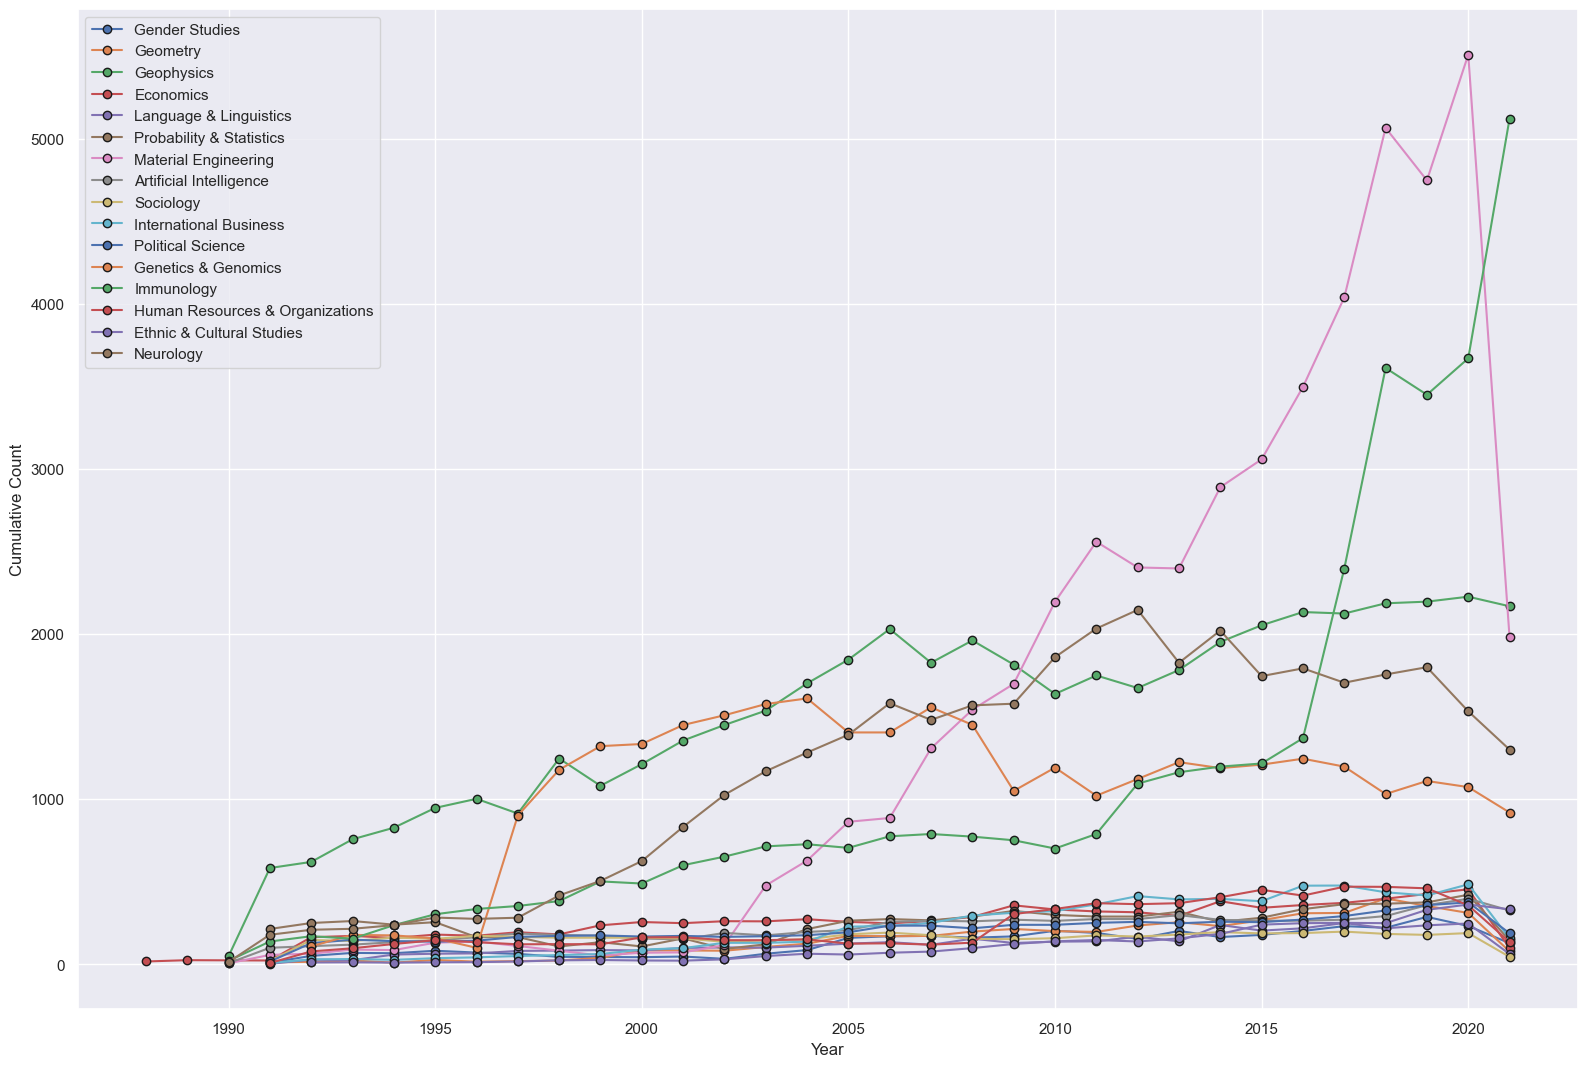

In [20]:
temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')

fig = plt.figure(figsize=(15, 10))
ax = fig.add_axes([0, 0, 1, 1])
for file_name in os.listdir(temporal_dfs_path):
    field_name = file_name.split('.parquet')[0]
    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    
    ax.plot(df['Year'], df['DoiCount'], 'o-', label=field_name, markeredgewidth=1, markeredgecolor='k')
    ax.set_xlabel('Year')
    ax.set_ylabel('Cumulative Count')

    ax.legend()

fig.tight_layout()
plt.show()

# Pooled Cum

/var/folders/rz/n4jmlyh1355cy_wkn5gd00x40000gn/T/ipykernel_19332/4105760455.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


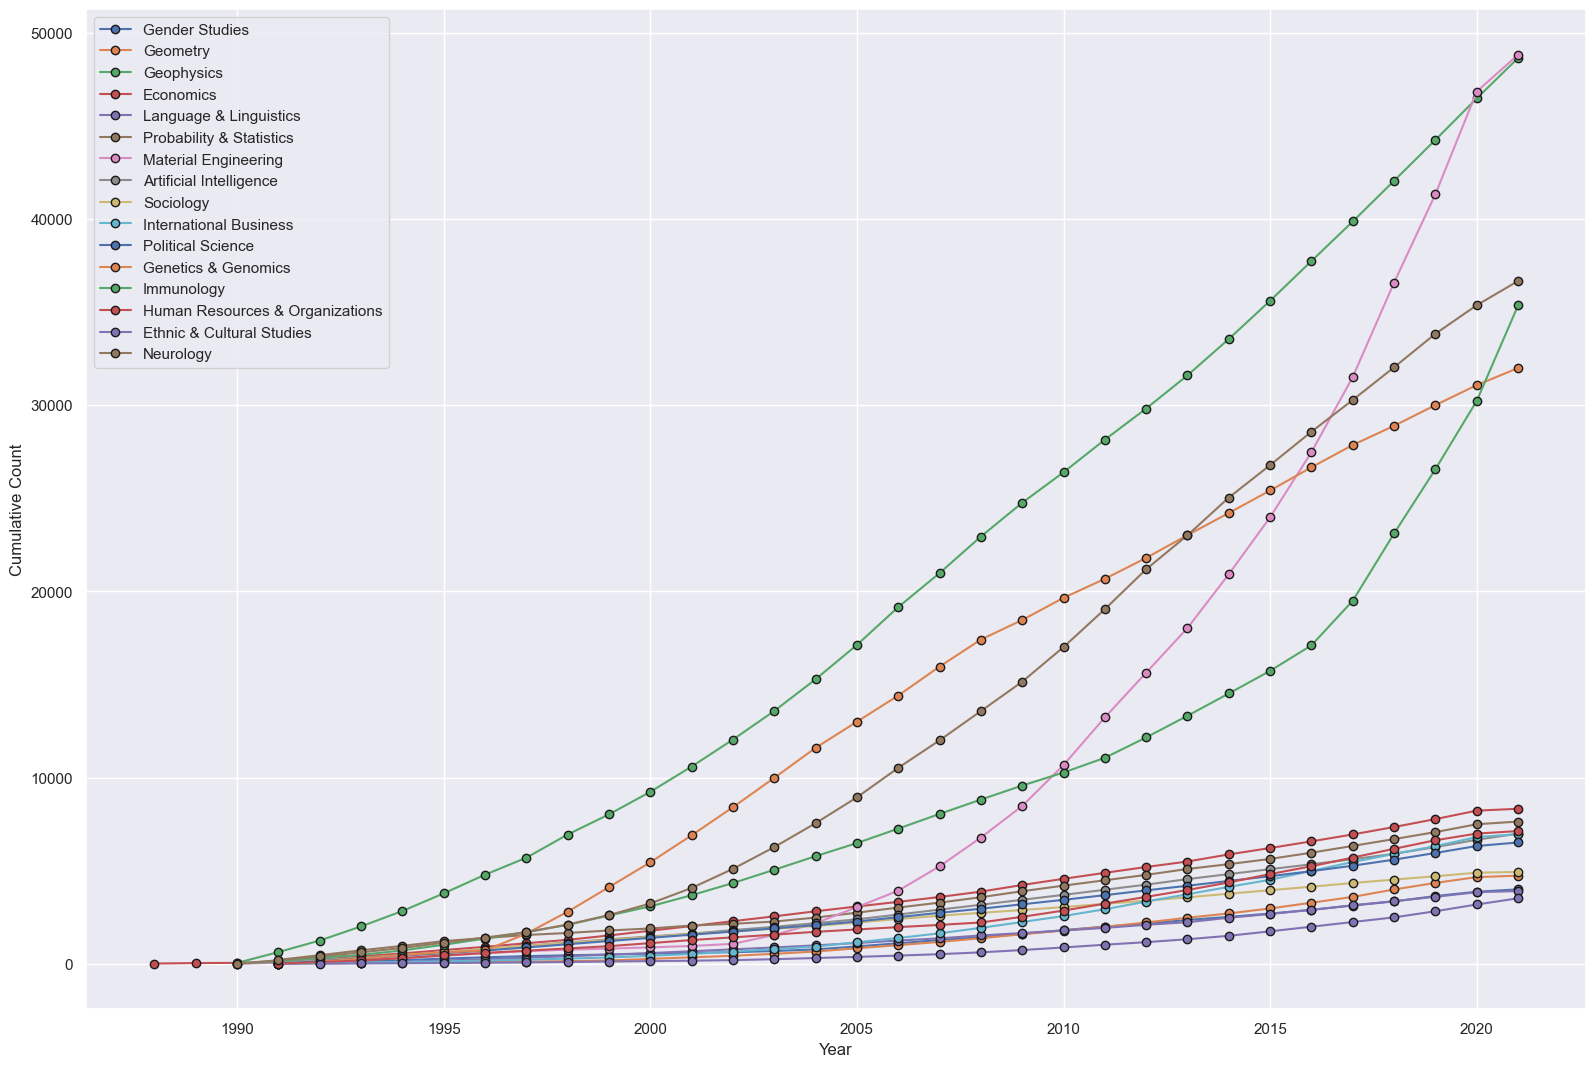

In [21]:
temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')

fig = plt.figure(figsize=(15, 10))
ax = fig.add_axes([0, 0, 1, 1])
for file_name in os.listdir(temporal_dfs_path):
    field_name = file_name.split('.parquet')[0]
    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    
    ax.plot(df['Year'], df['CumDoiCount'], 'o-', label=field_name, markeredgewidth=1, markeredgecolor='k')
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Cumulative Count')

    ax.legend()

fig.tight_layout()
plt.show()

# Individual Cum

/var/folders/rz/n4jmlyh1355cy_wkn5gd00x40000gn/T/ipykernel_19332/2256464548.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


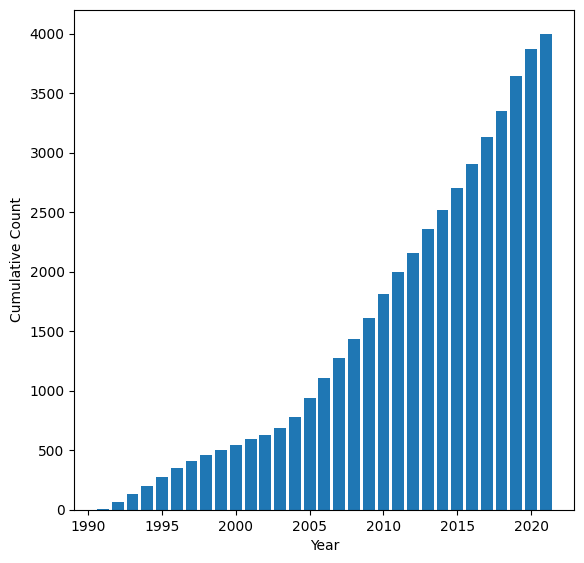

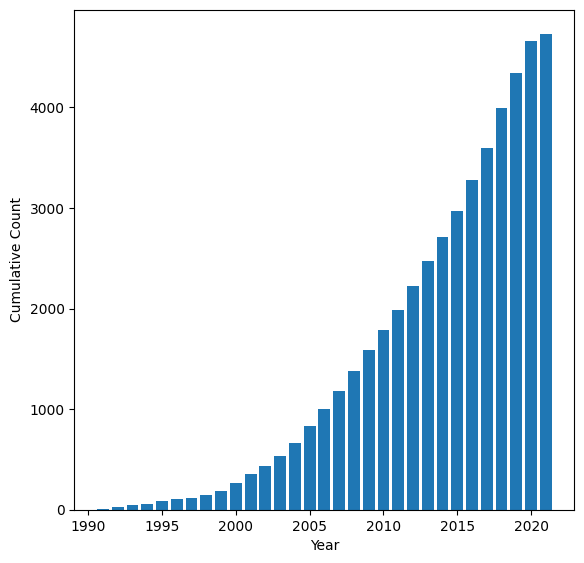

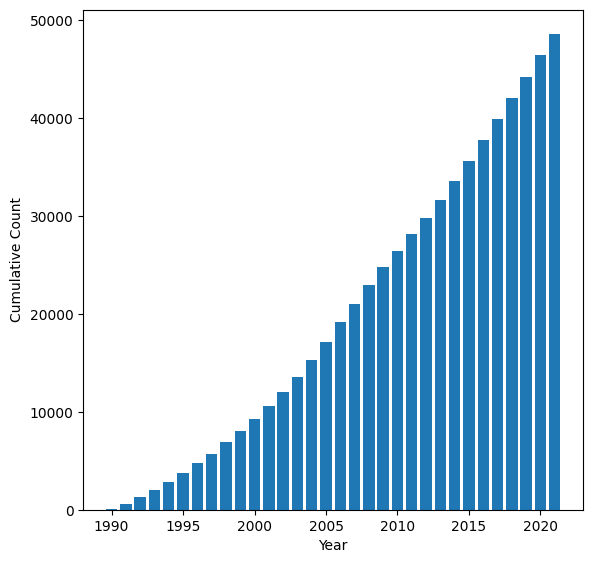

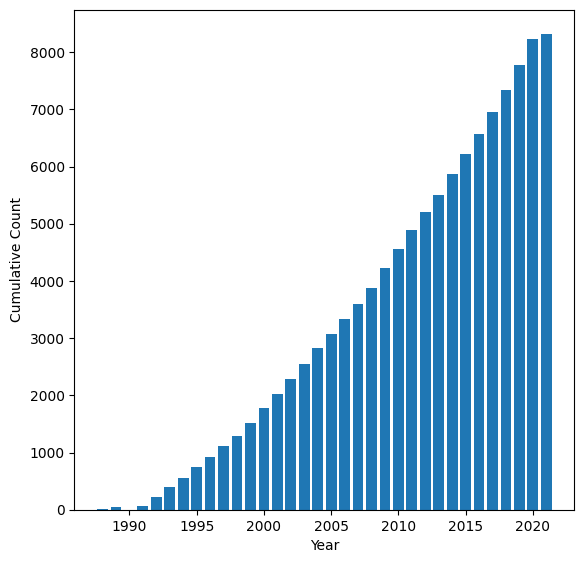

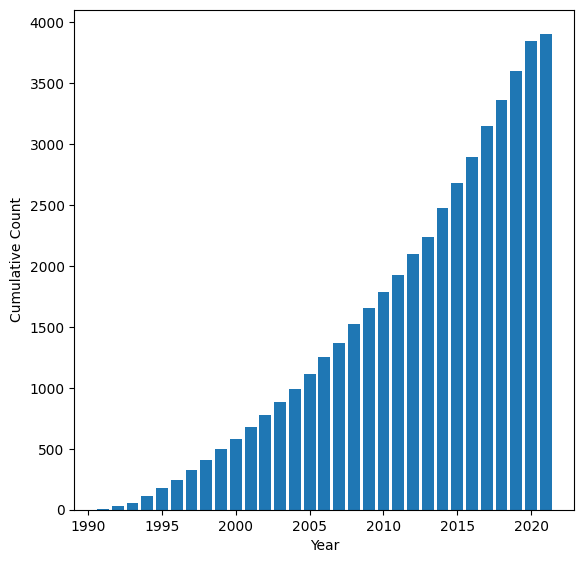

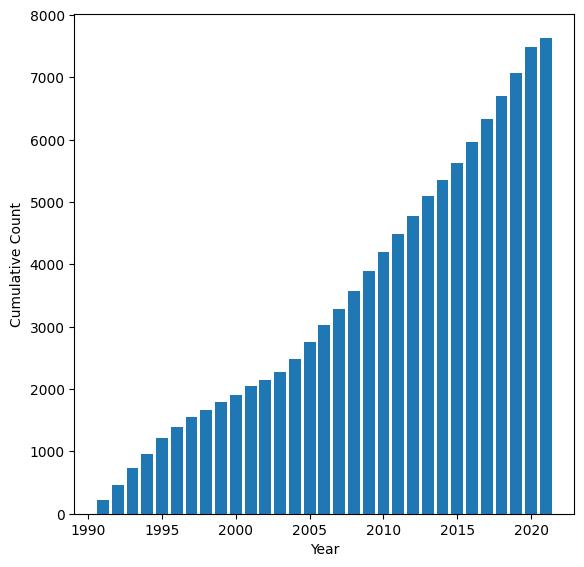

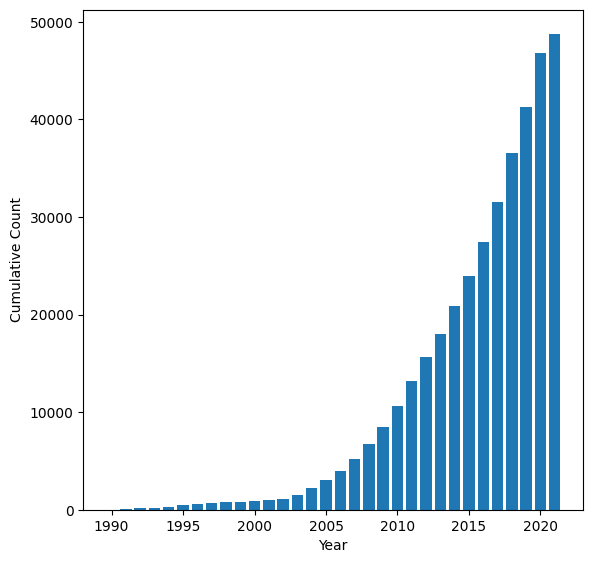

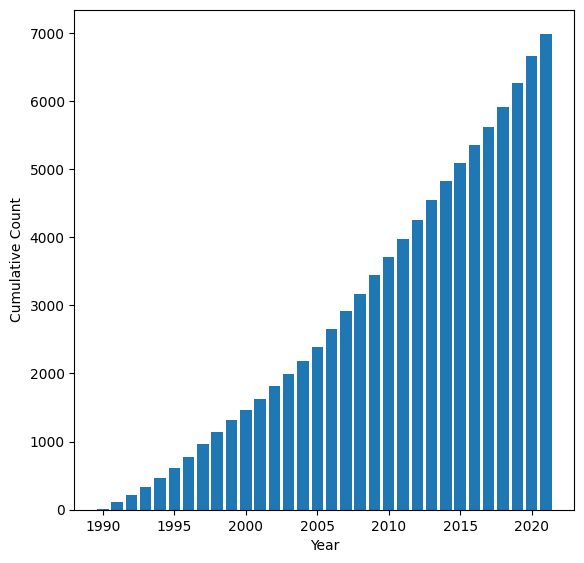

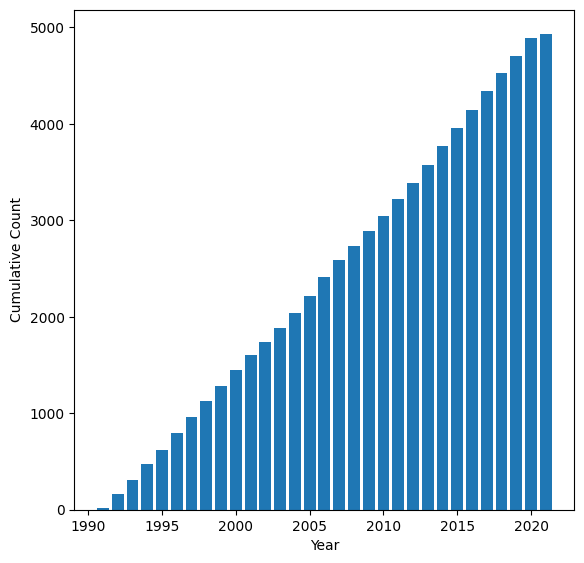

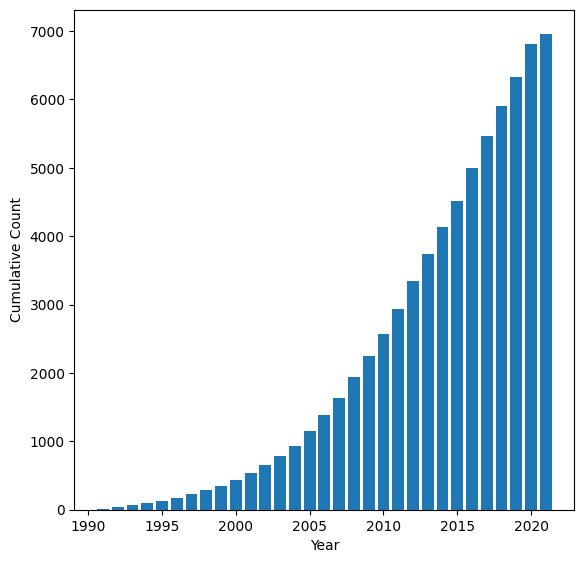

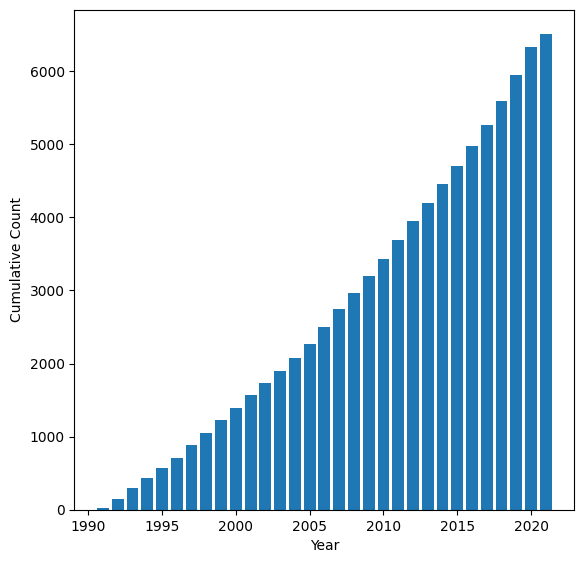

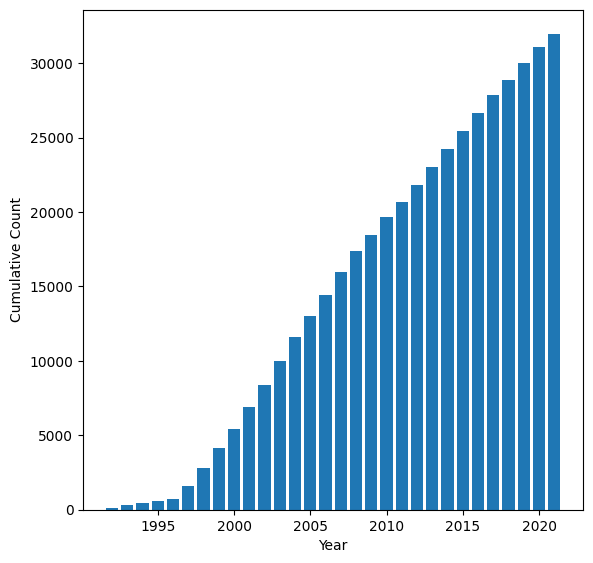

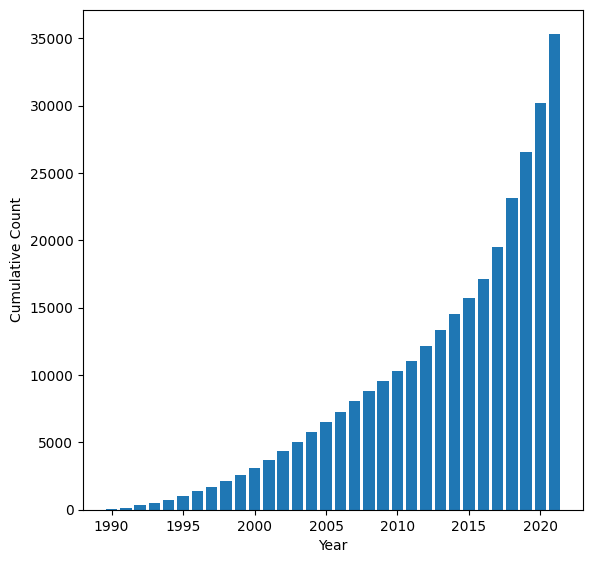

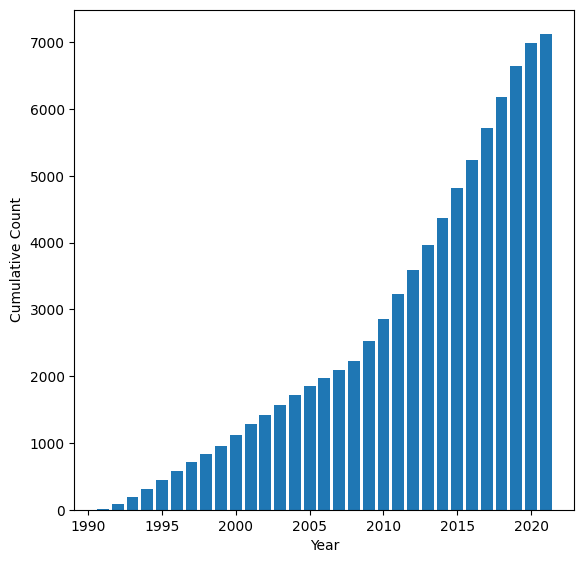

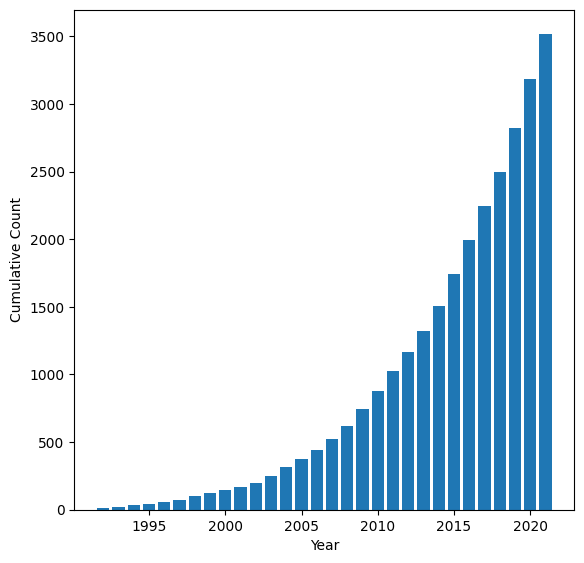

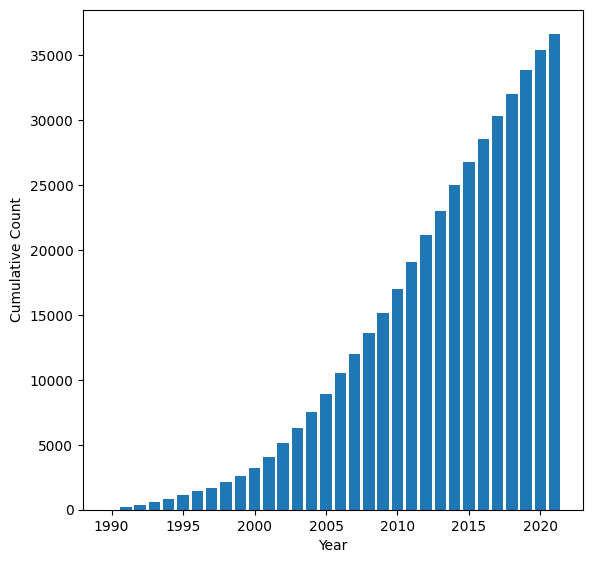

In [22]:
sns.reset_defaults()

temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')

for file_name in os.listdir(temporal_dfs_path):

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_axes([0, 0, 1, 1])

    field_name = file_name.split('.parquet')[0]
    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    
    ax.bar(df['Year'], df['CumDoiCount'])
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Cumulative Count')

    ax.grid(False)
    fig.tight_layout()

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'citation_temp_cum_dist', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=150,
        bbox_inches='tight',
    )

# Individual Freq

/var/folders/rz/n4jmlyh1355cy_wkn5gd00x40000gn/T/ipykernel_19332/3434534931.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


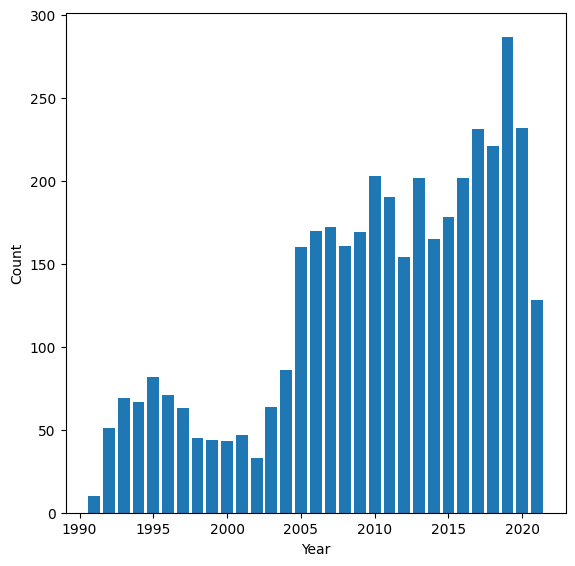

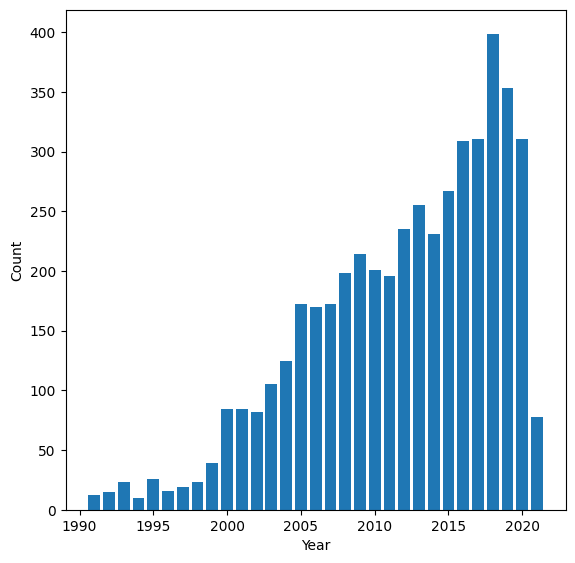

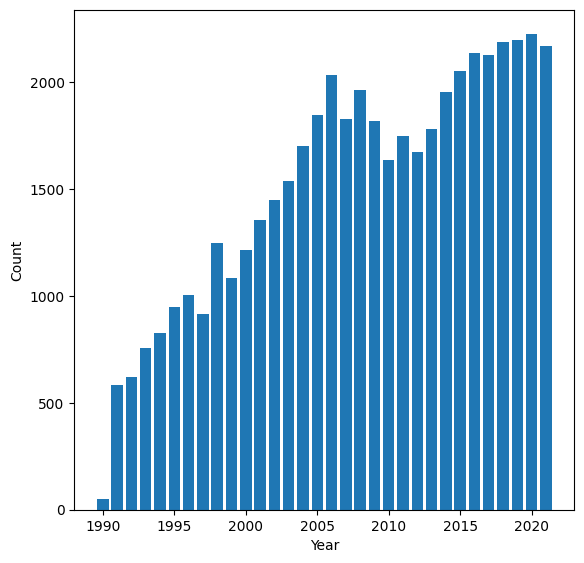

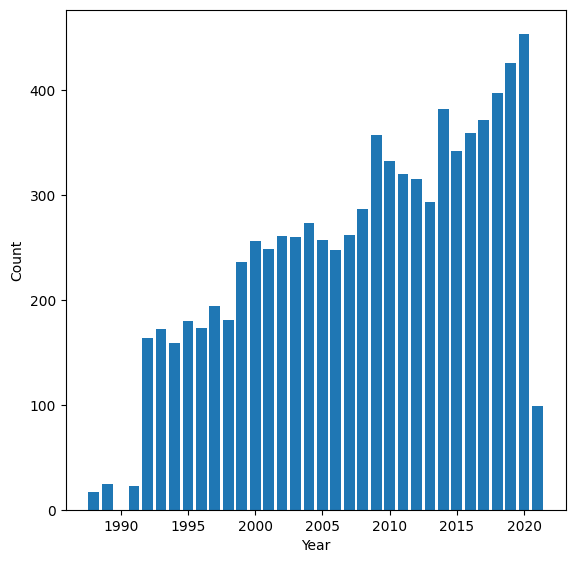

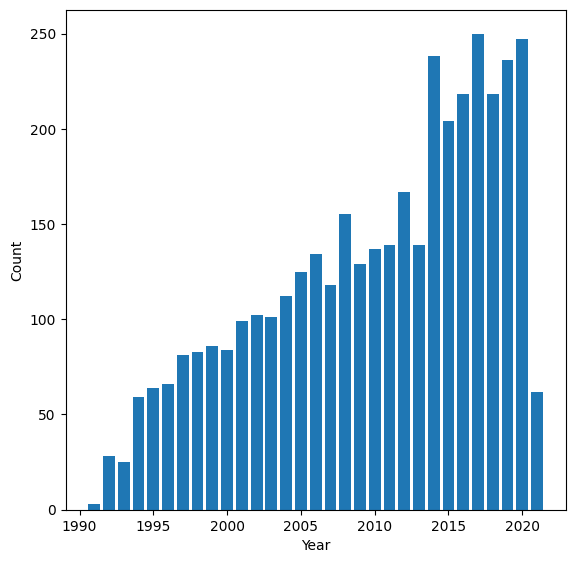

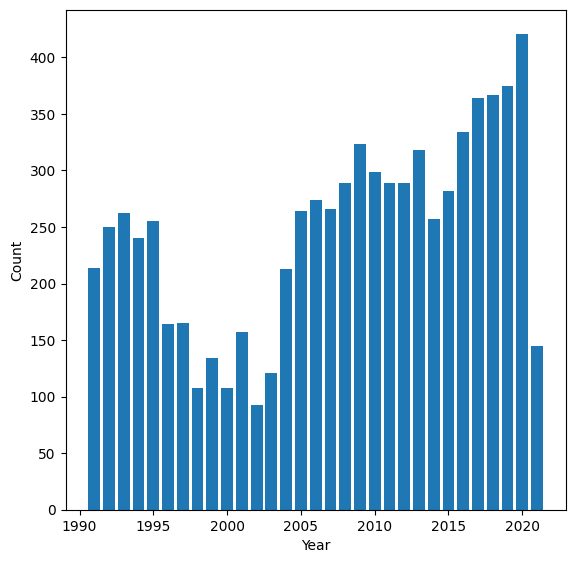

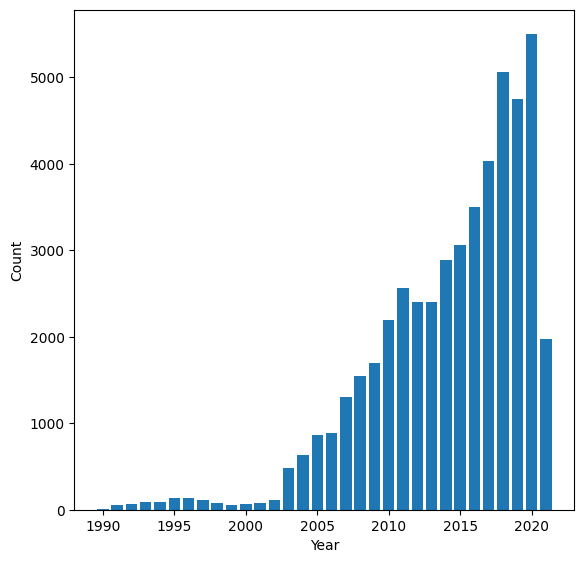

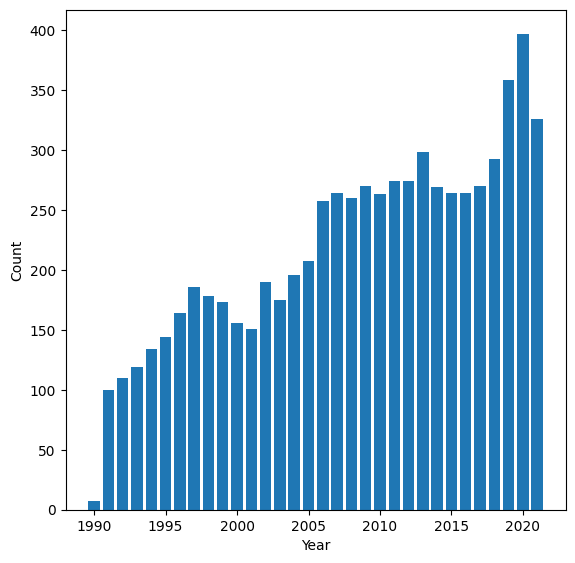

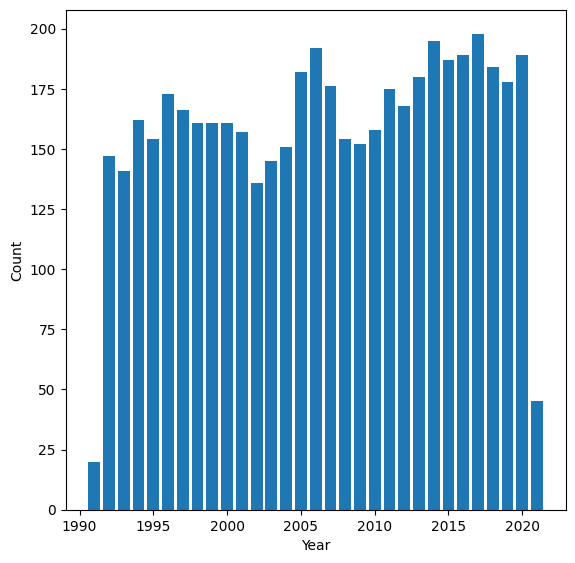

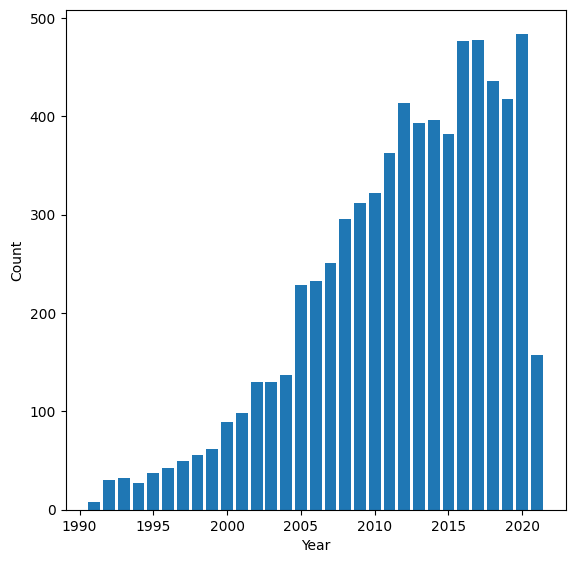

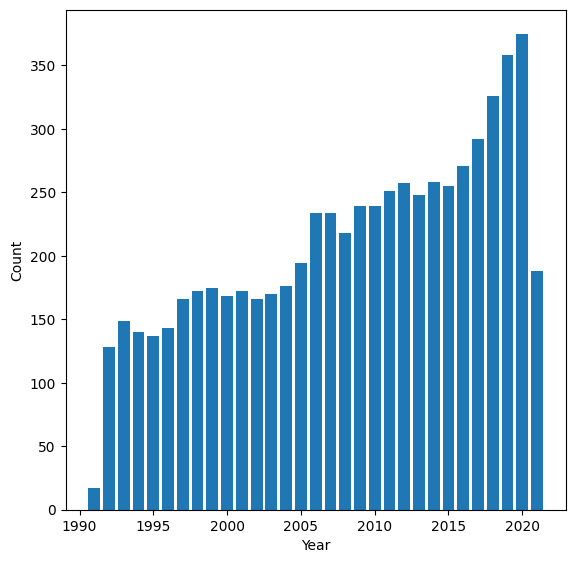

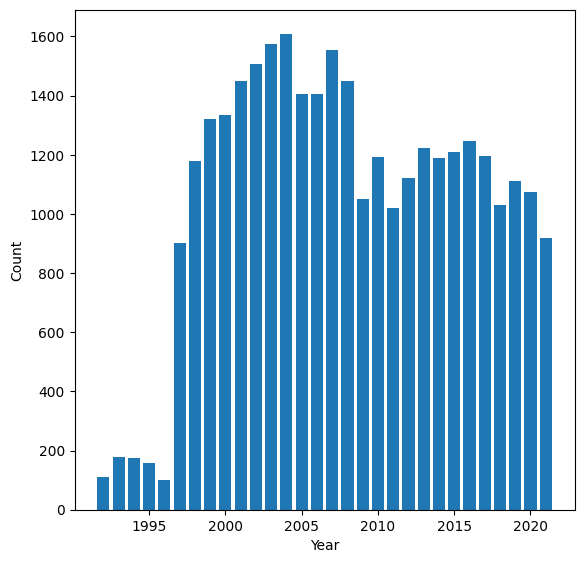

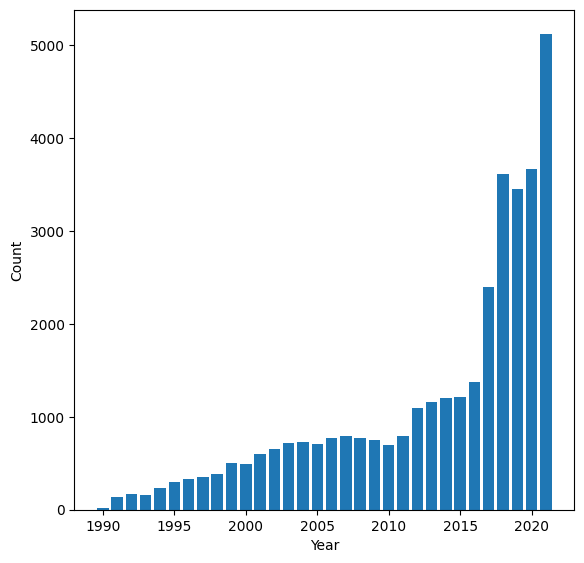

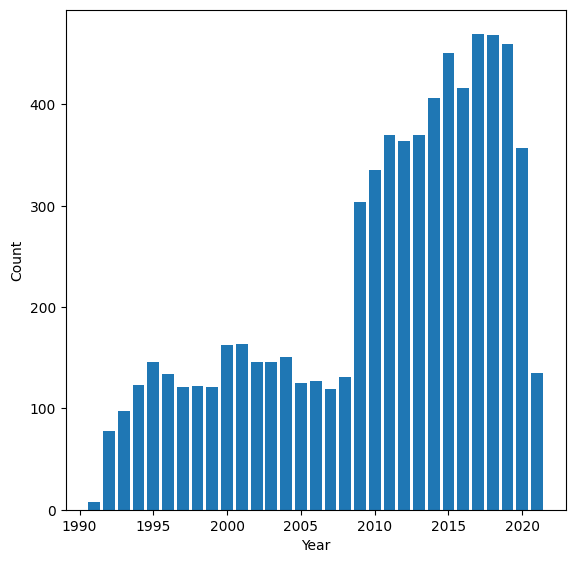

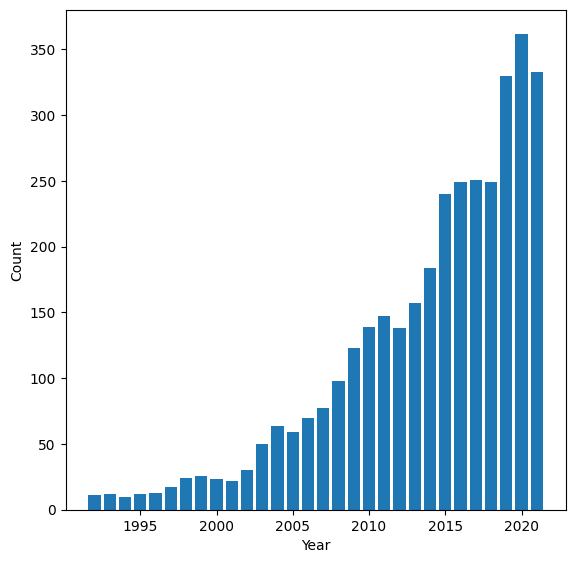

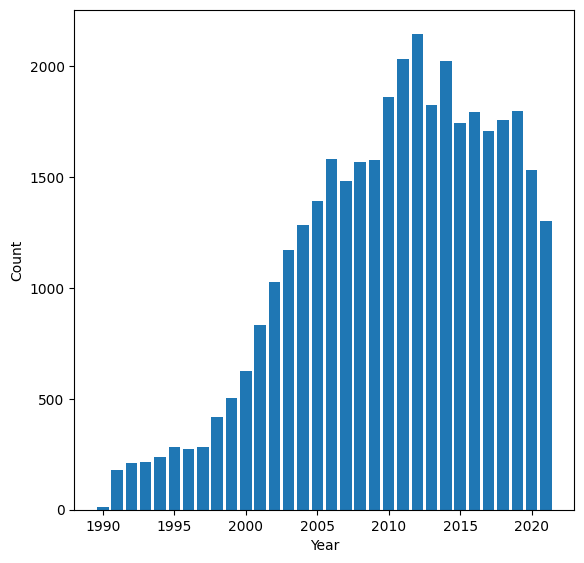

In [23]:
sns.reset_defaults()

temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')

for file_name in os.listdir(temporal_dfs_path):

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_axes([0, 0, 1, 1])

    field_name = file_name.split('.parquet')[0]
    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    
    ax.bar(df['Year'], df['DoiCount'])
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

    ax.grid(False)
    fig.tight_layout()

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'citation_temp_dist', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=150,
        bbox_inches='tight',
    )

# Temporal DAG Longest Path Length

/var/folders/rz/n4jmlyh1355cy_wkn5gd00x40000gn/T/ipykernel_19332/230965579.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


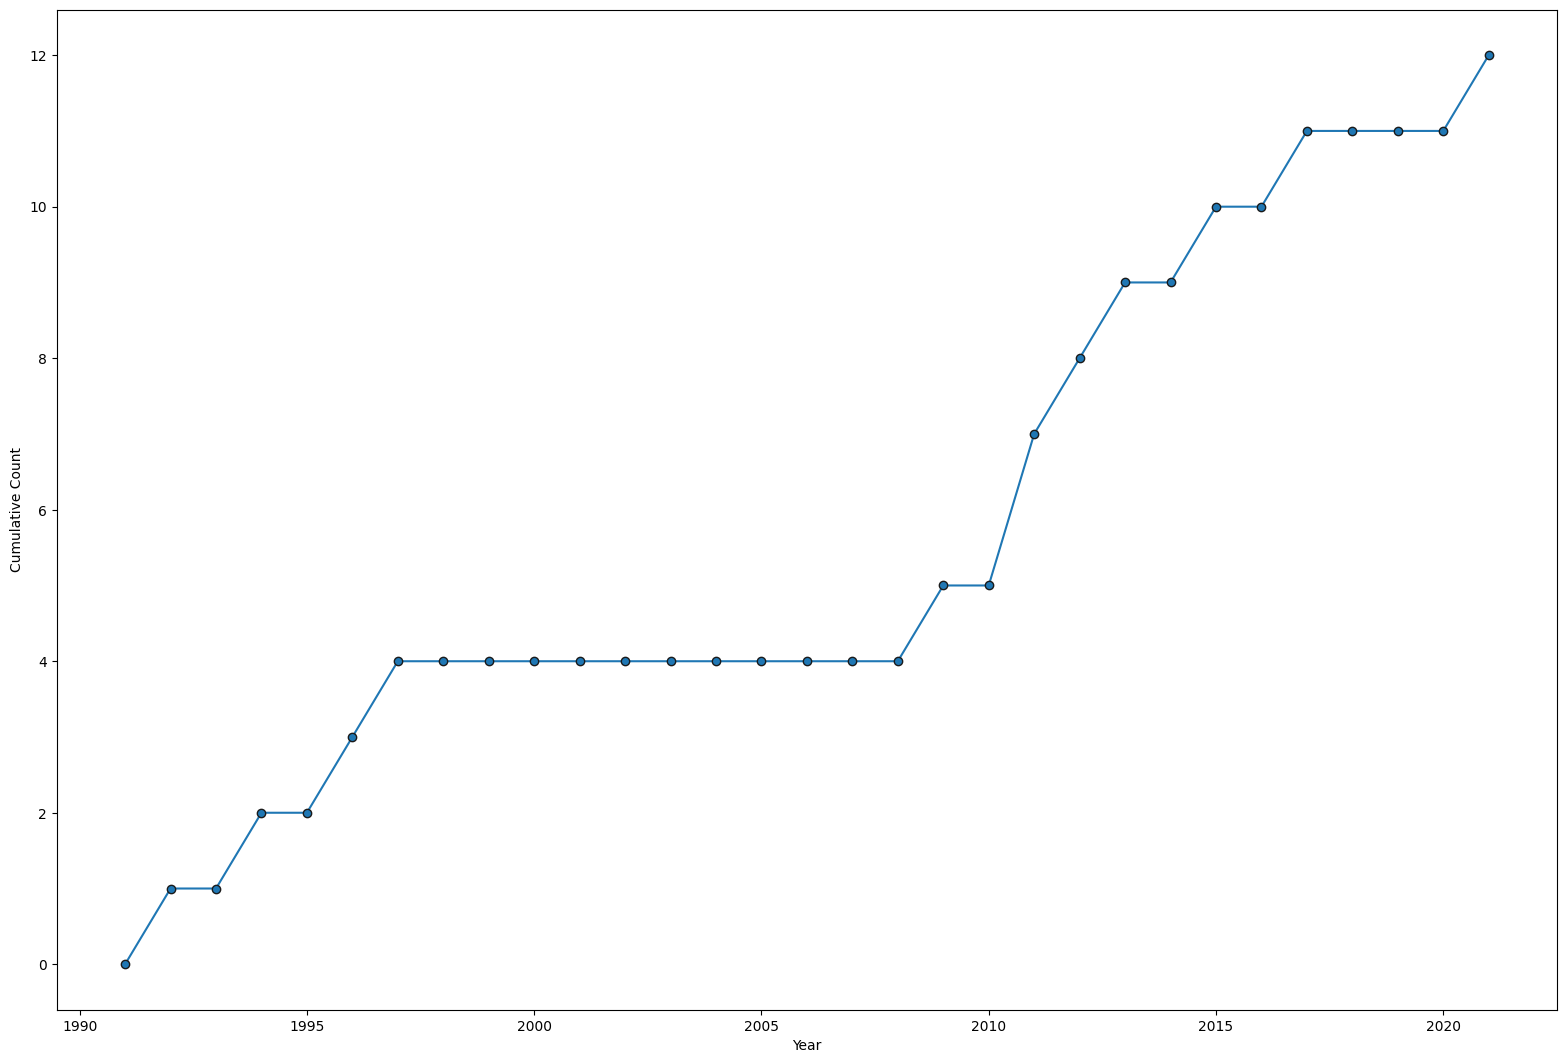

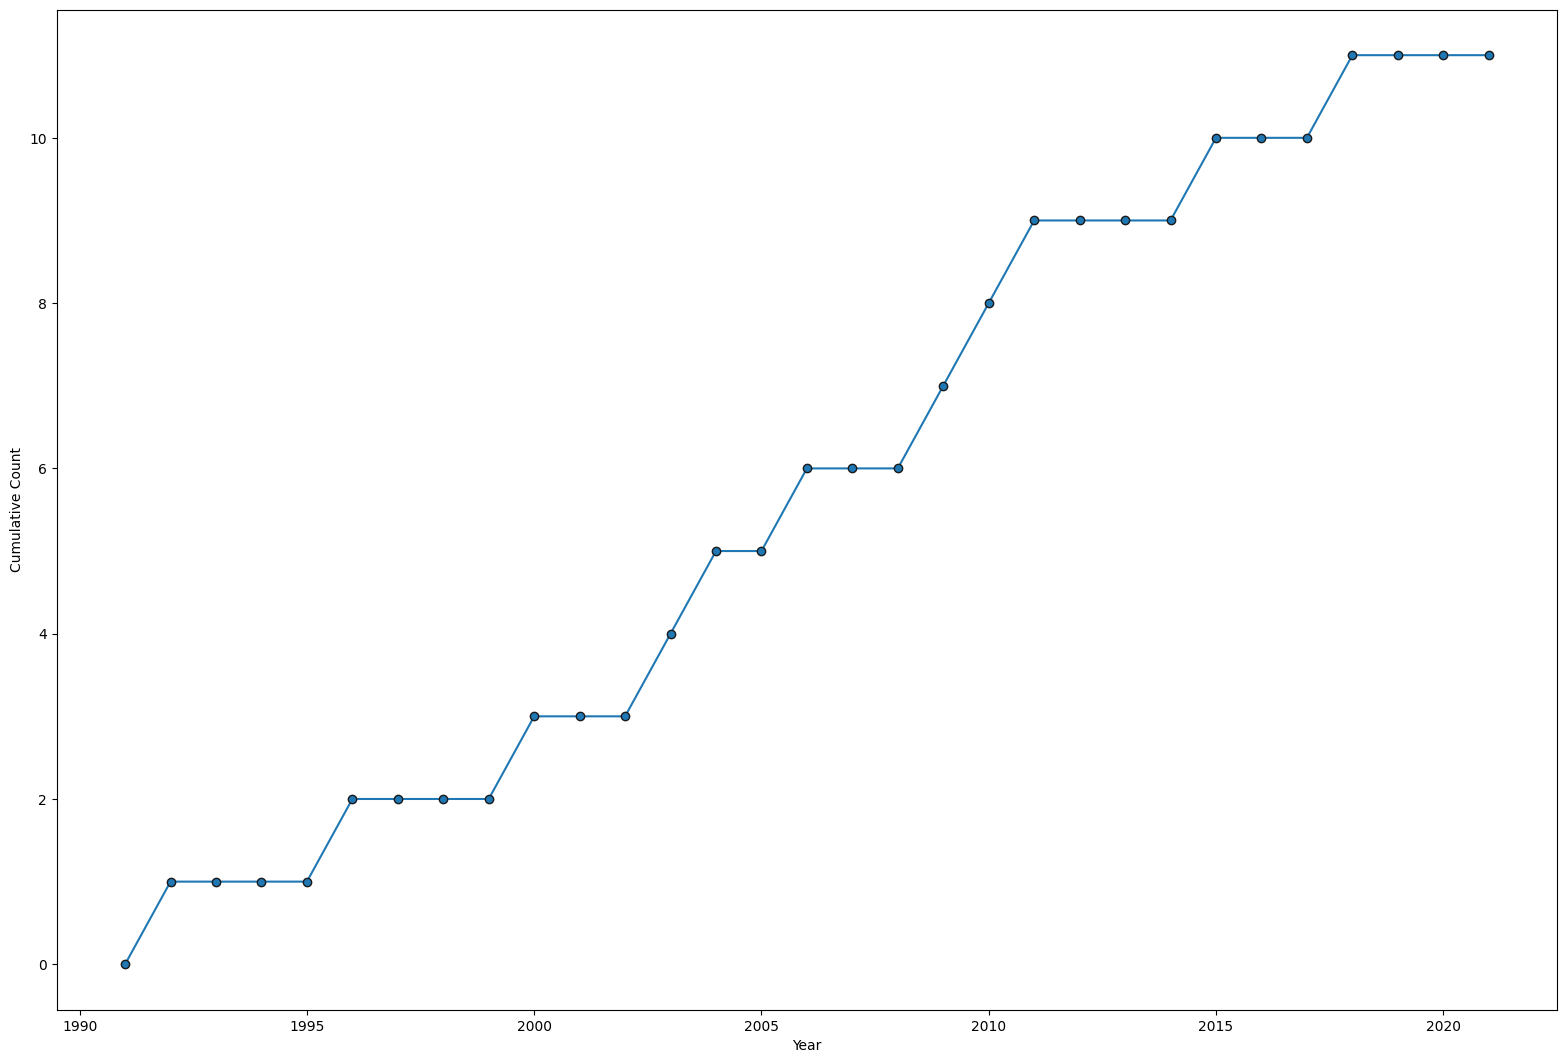

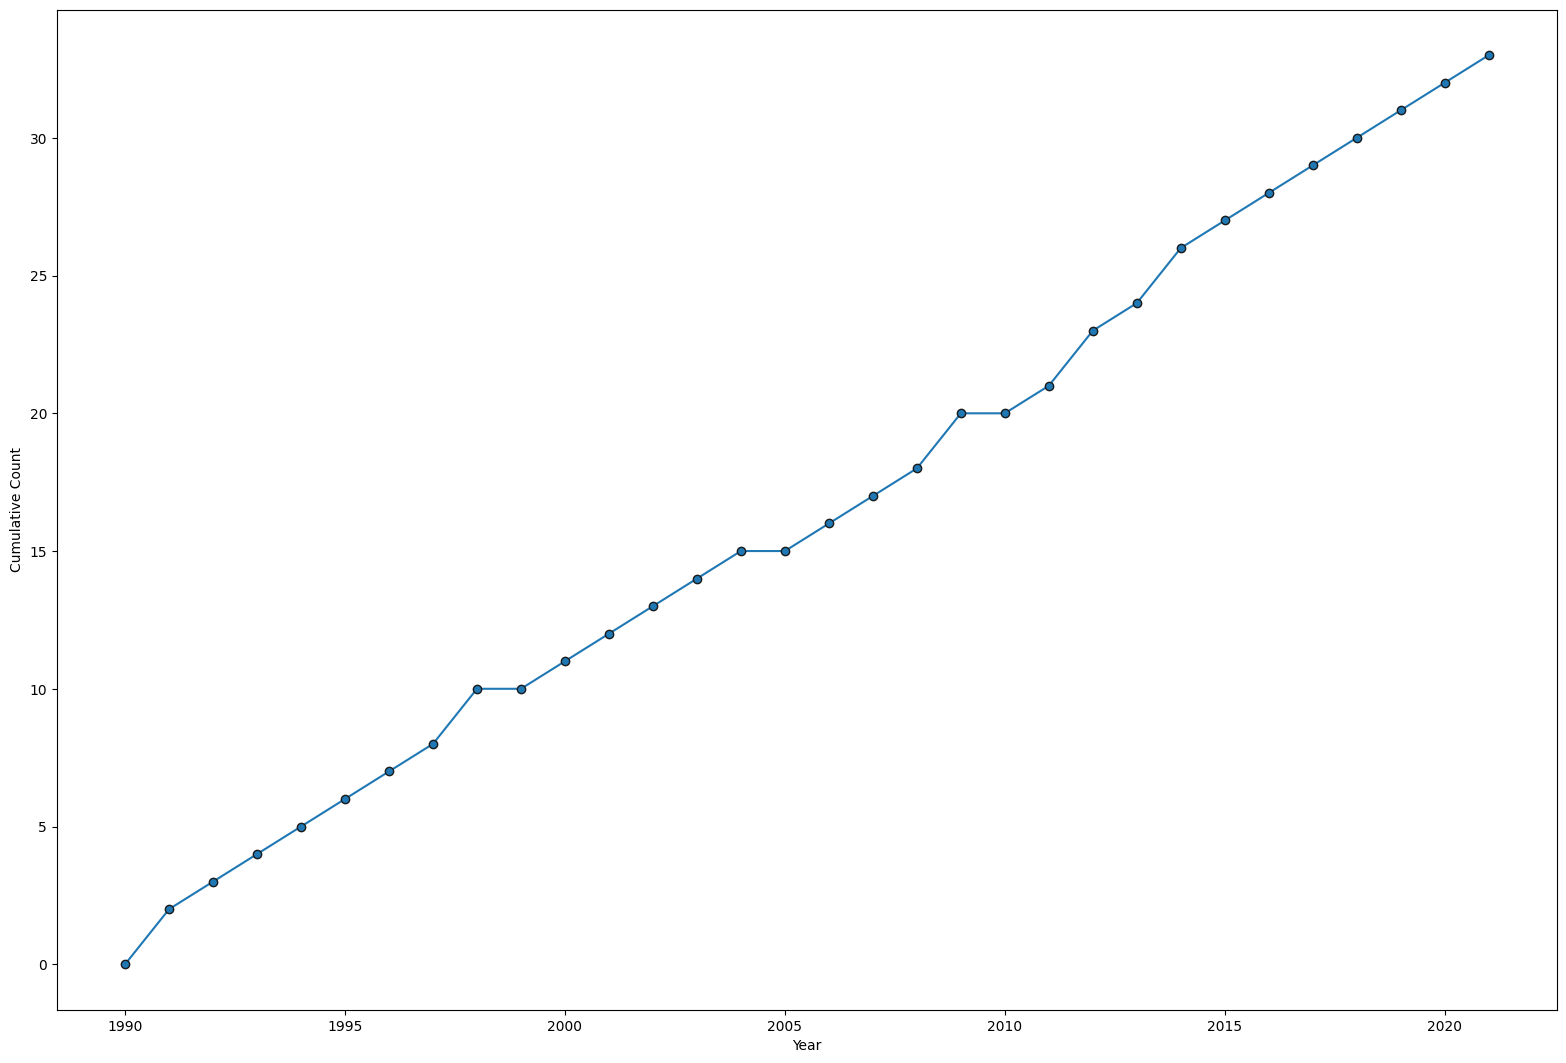

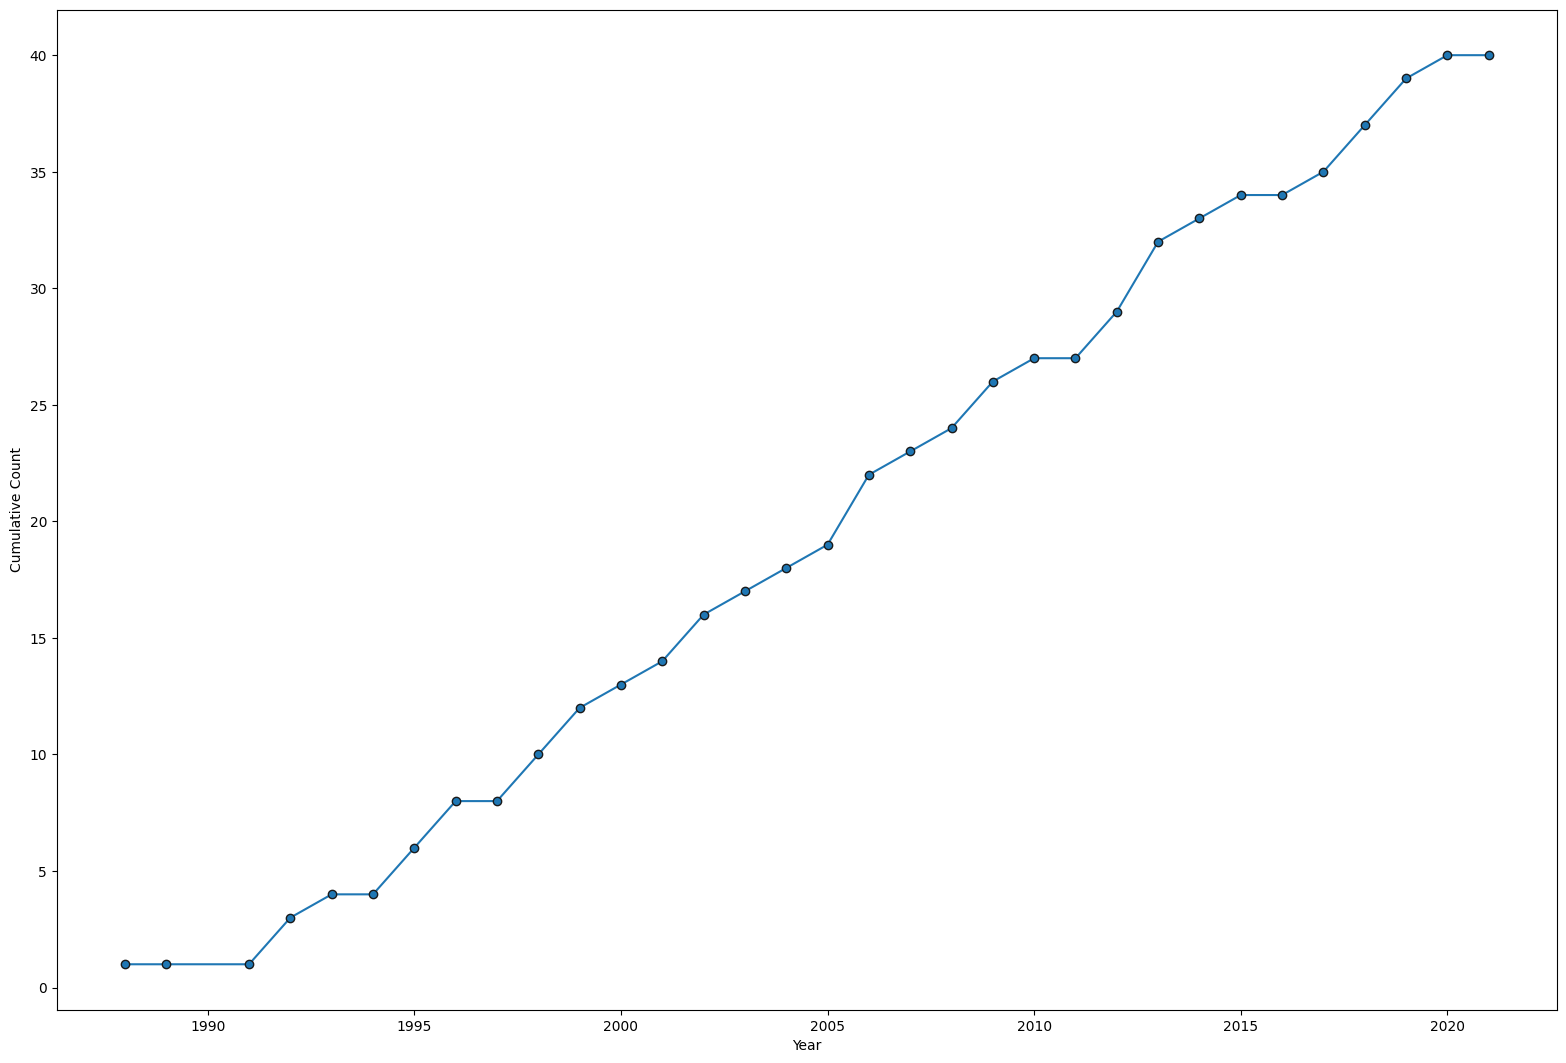

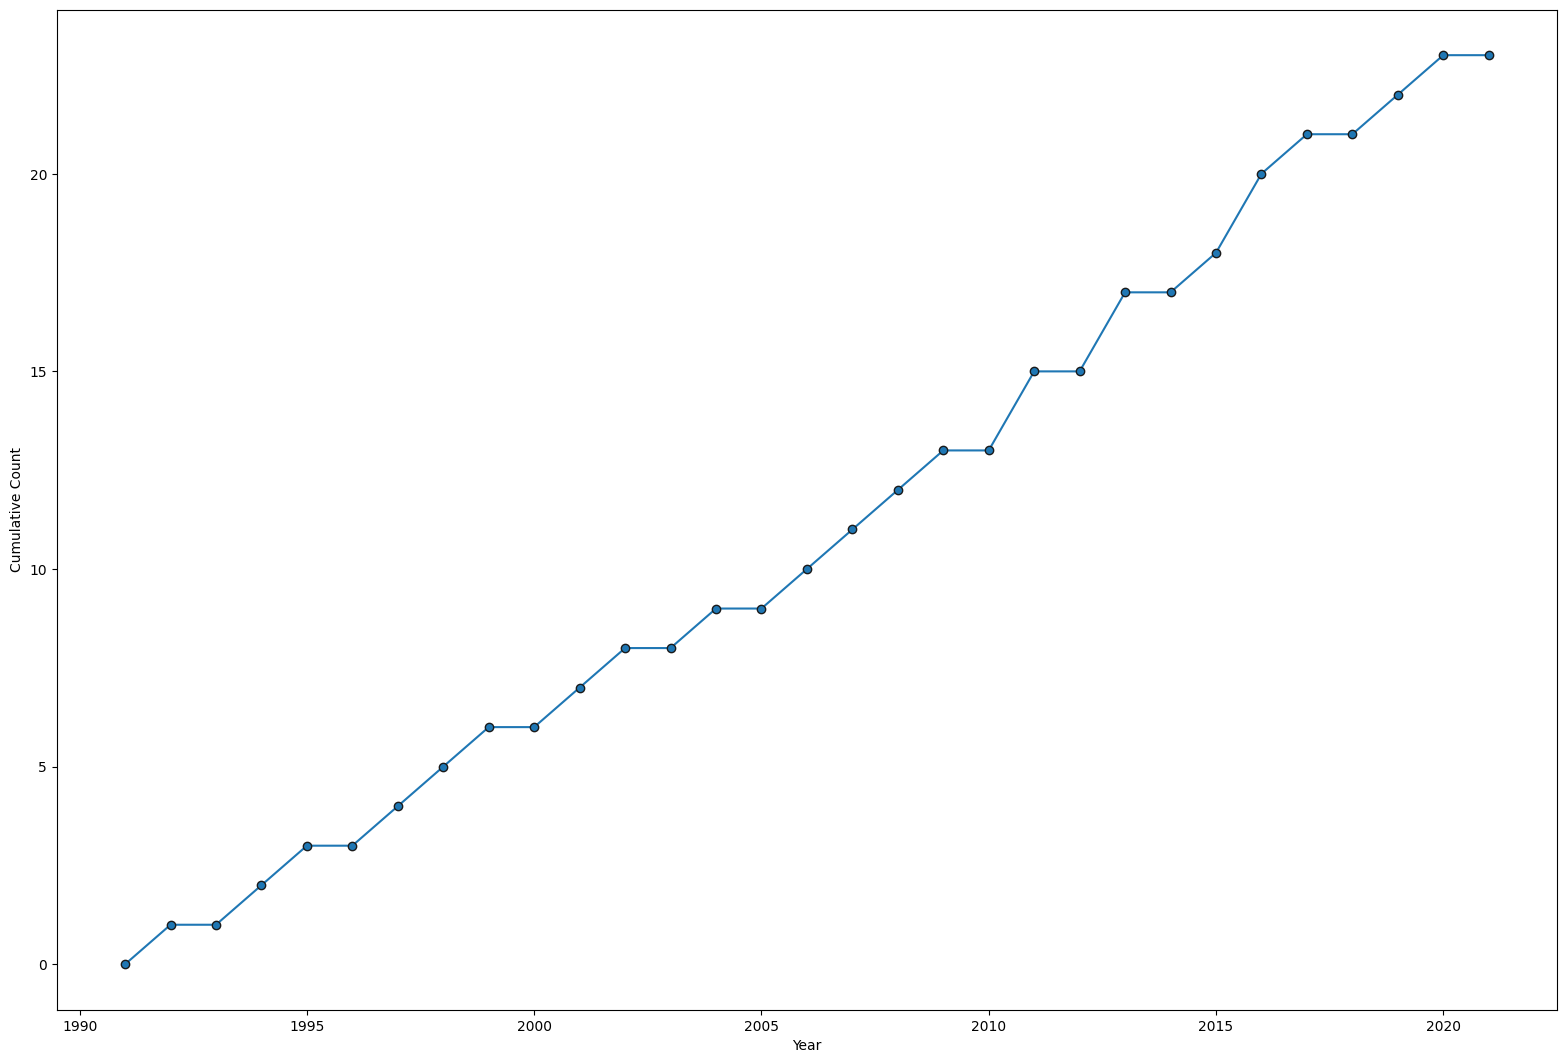

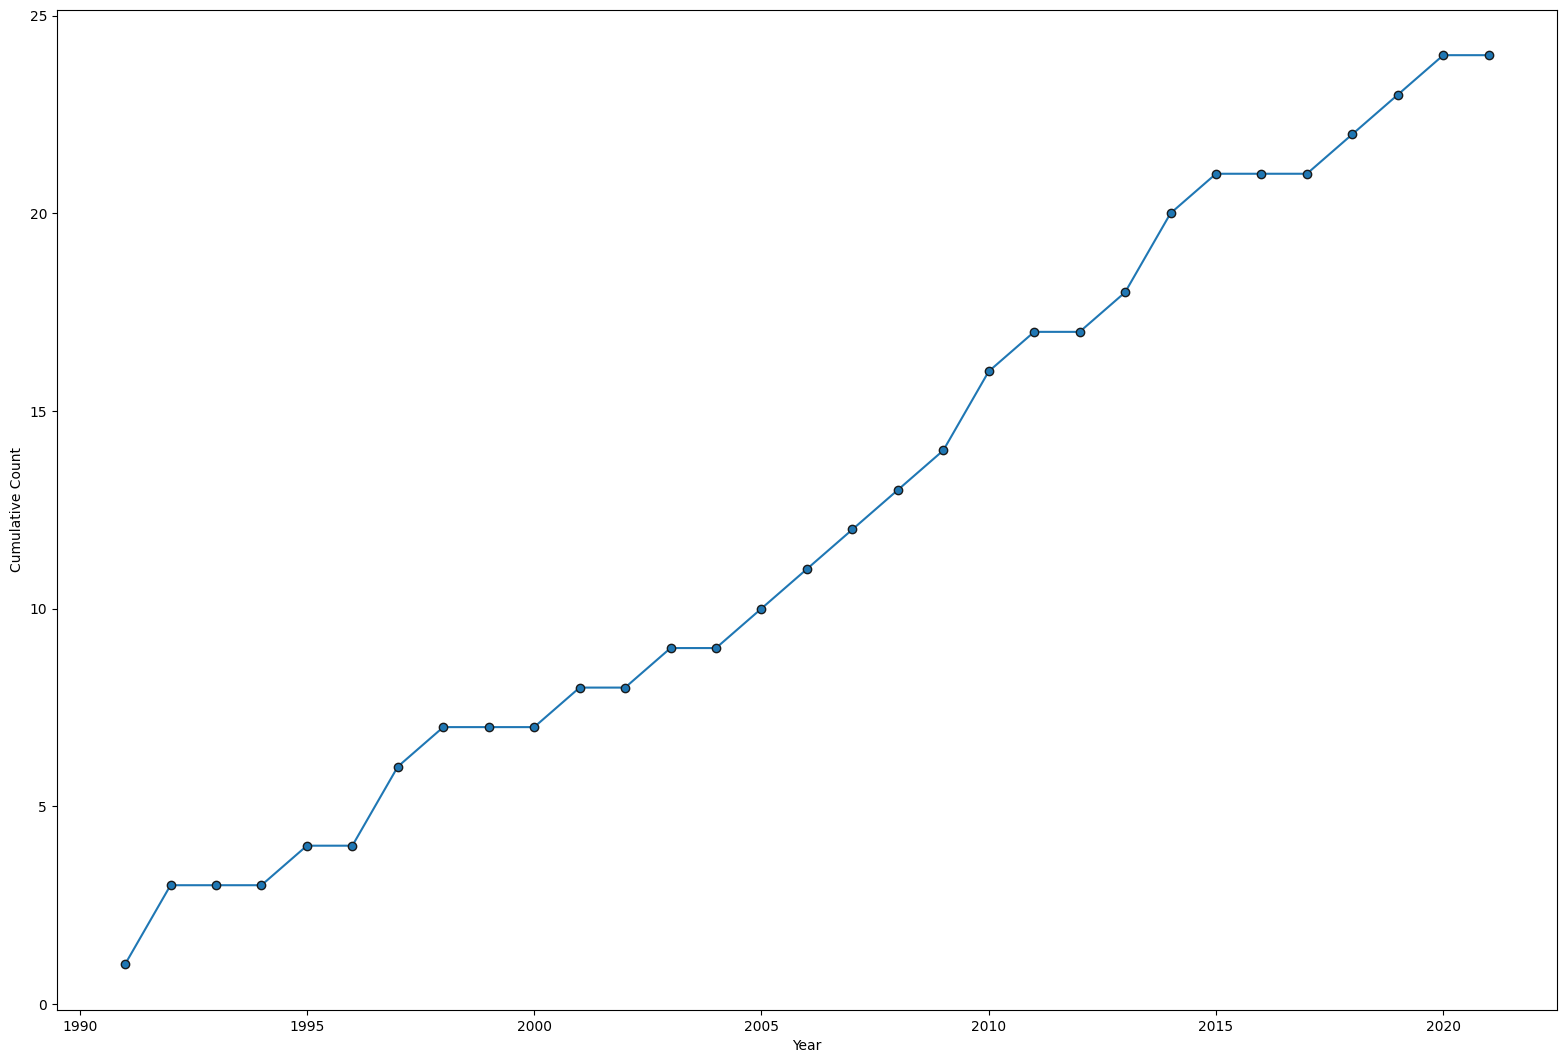

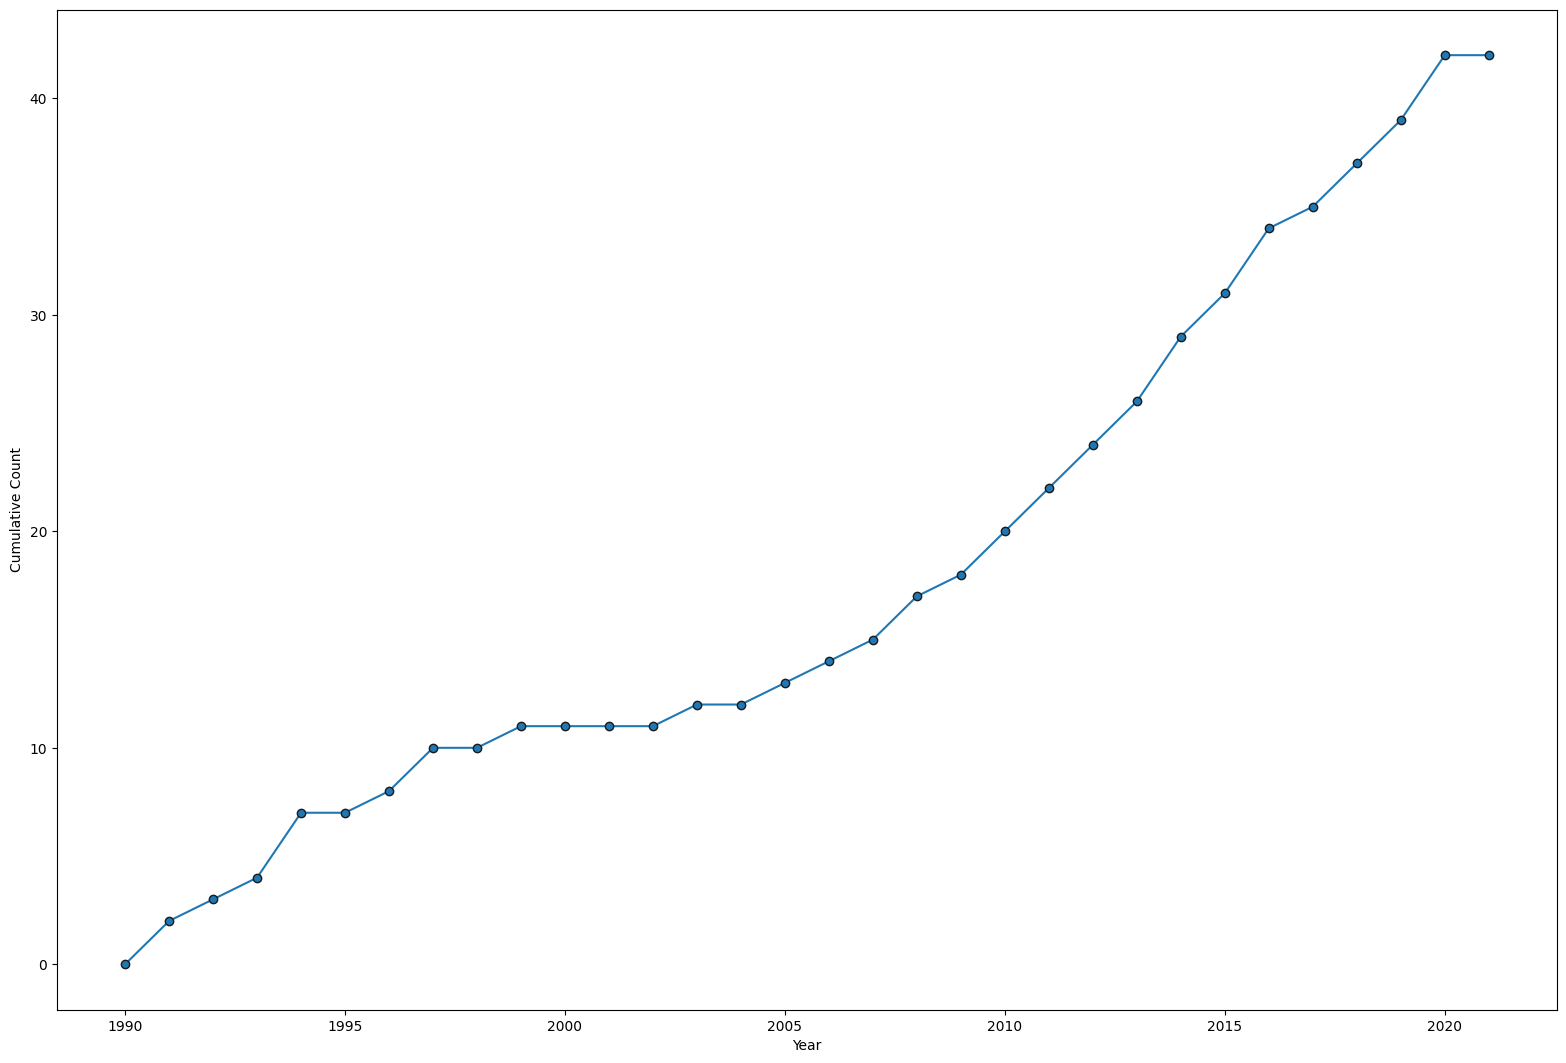

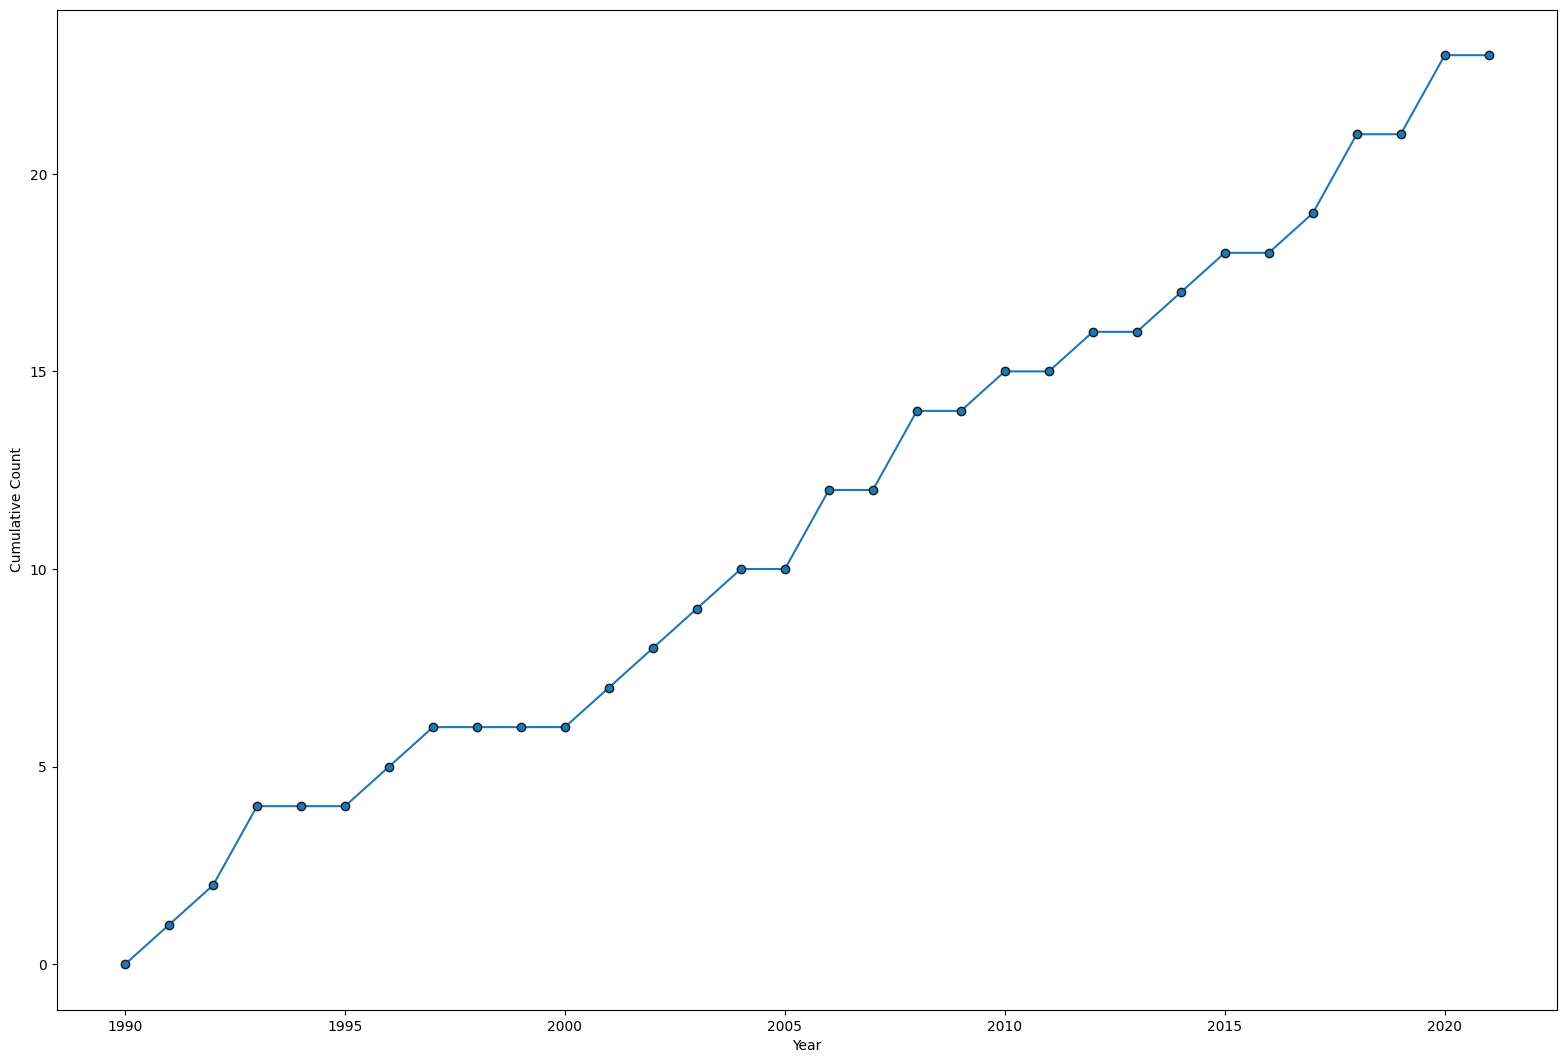

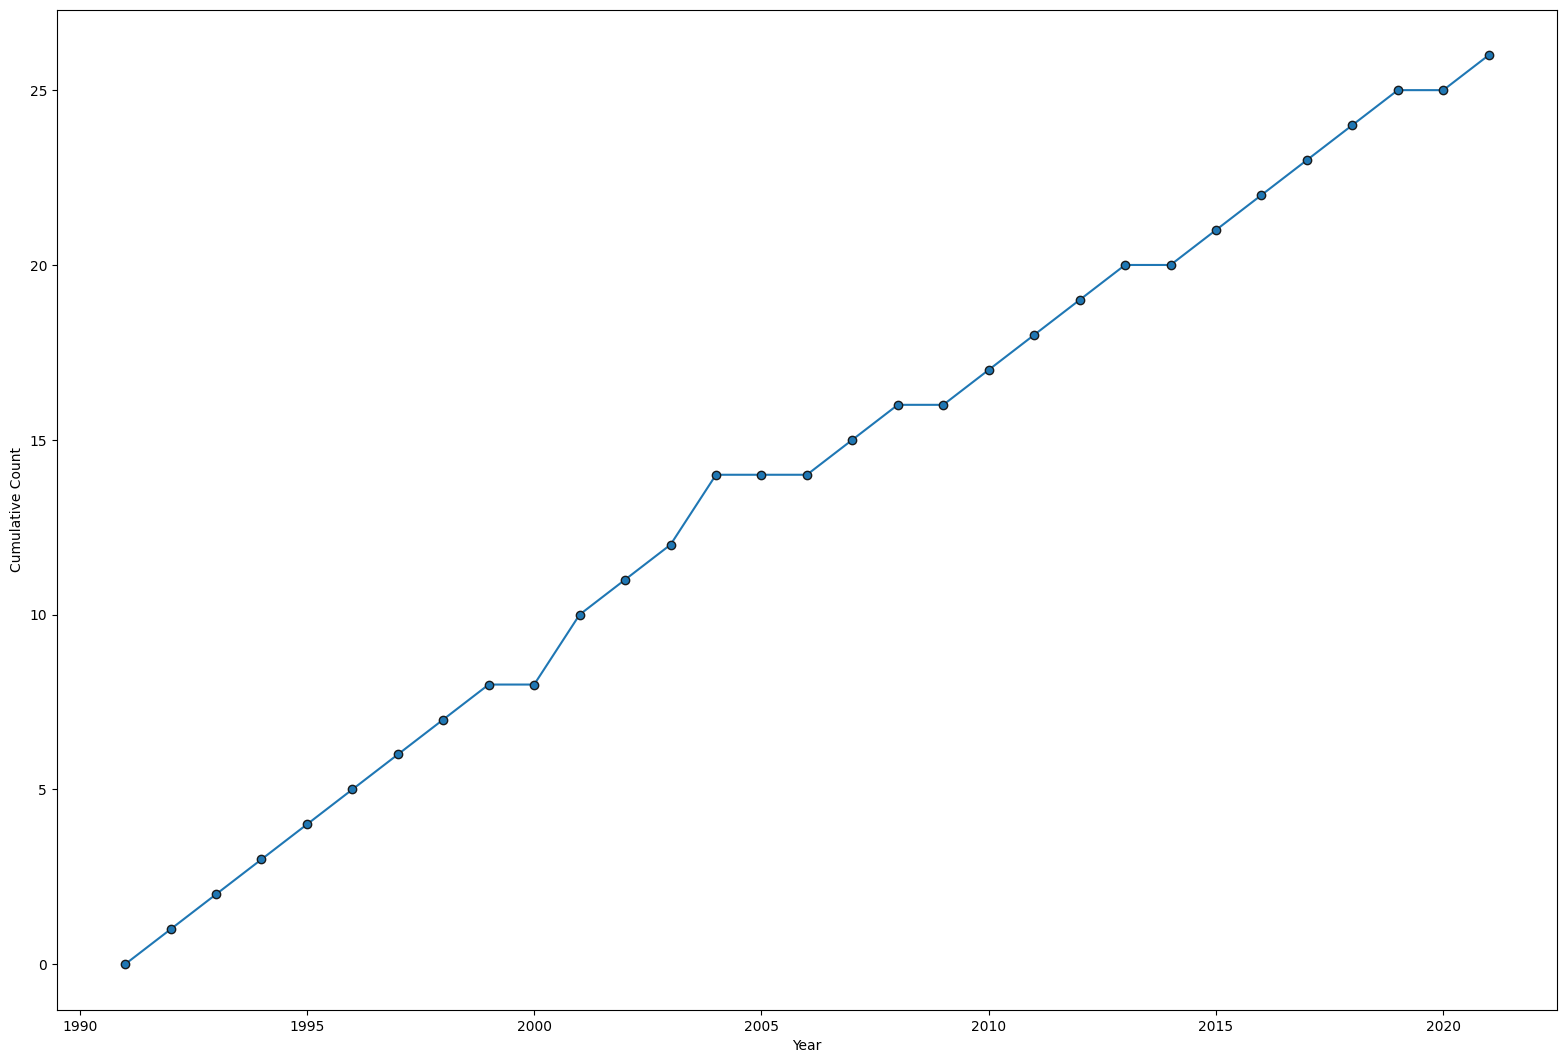

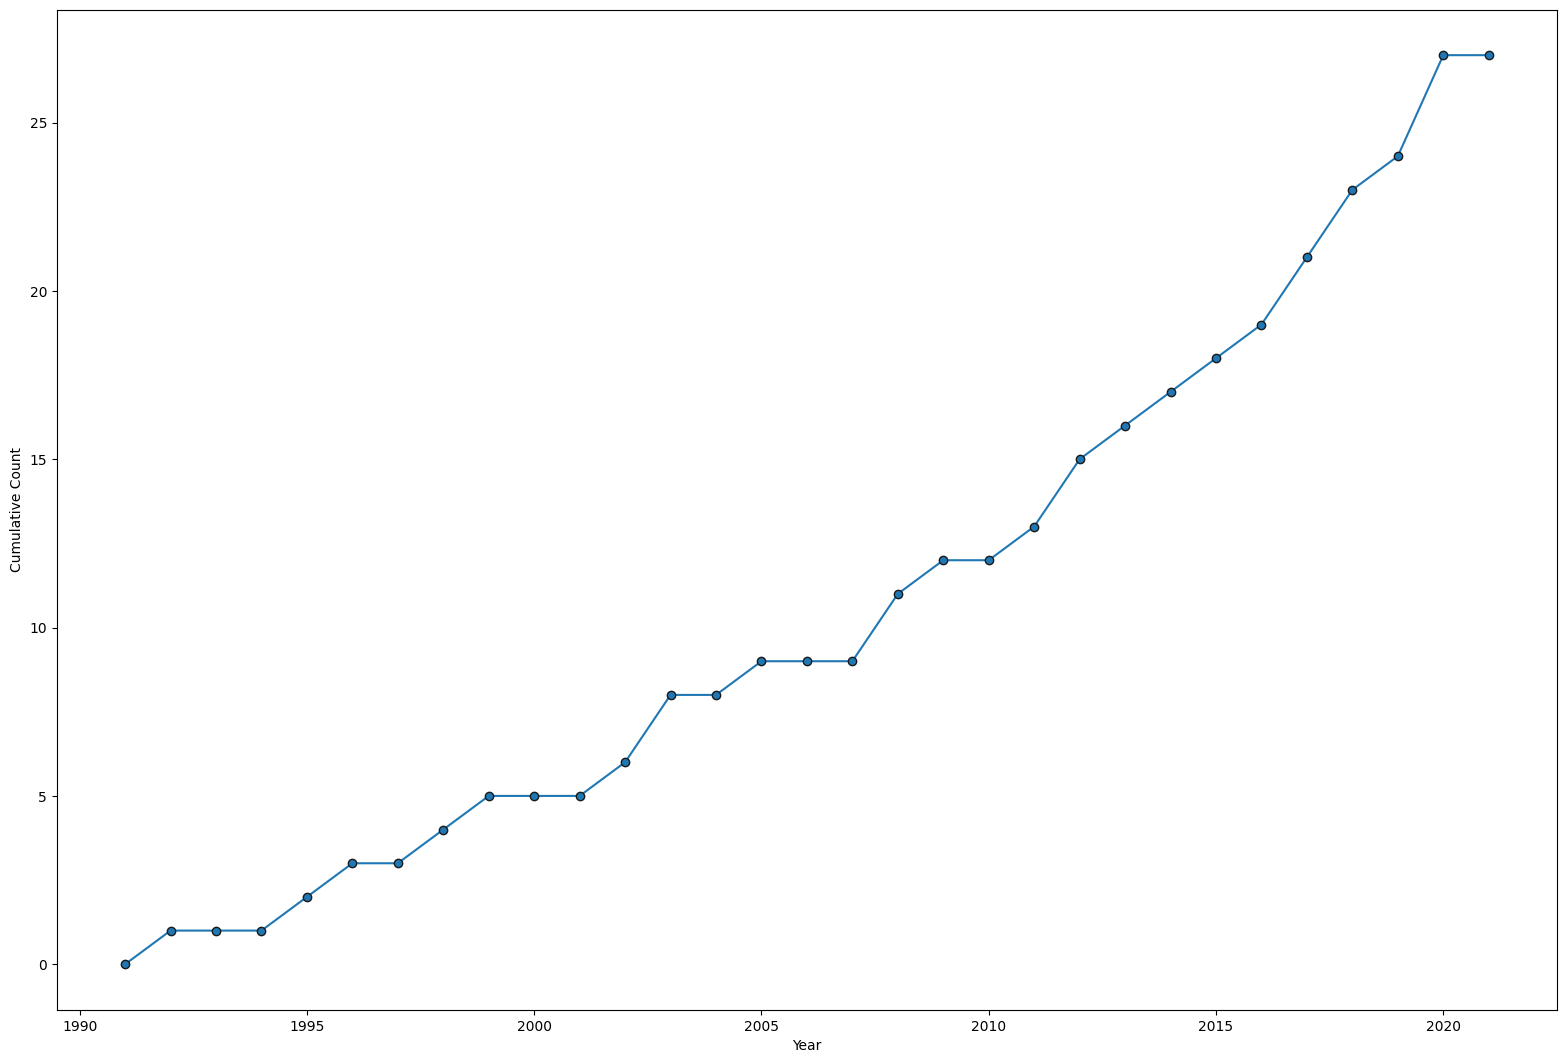

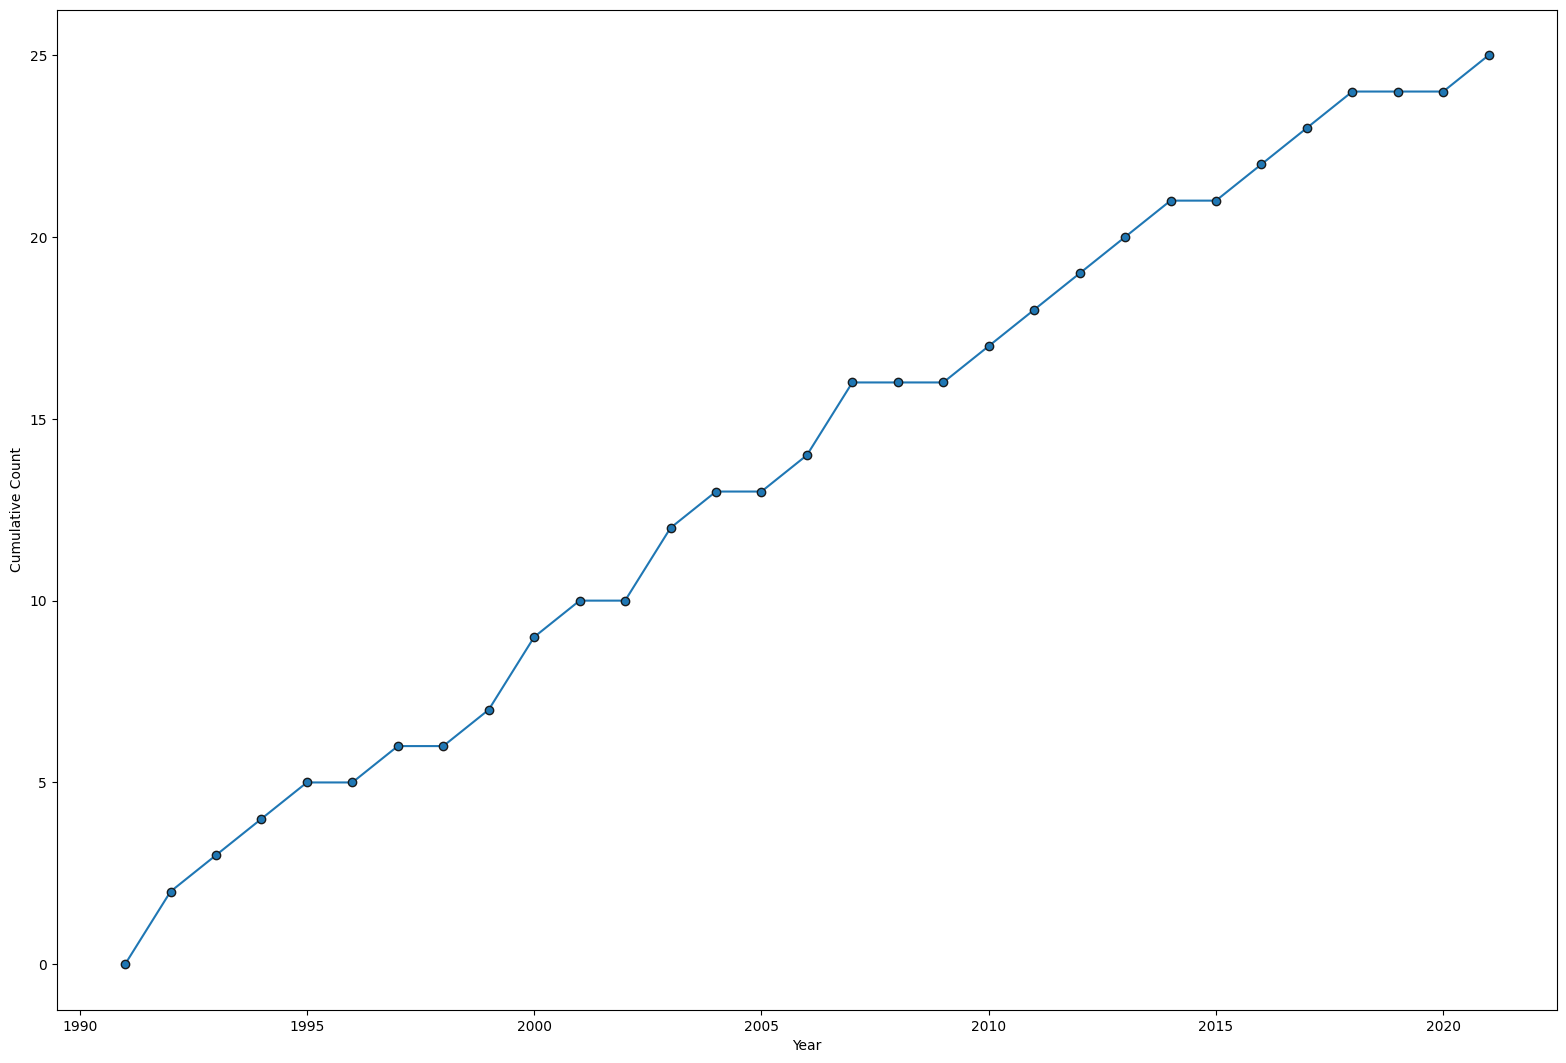

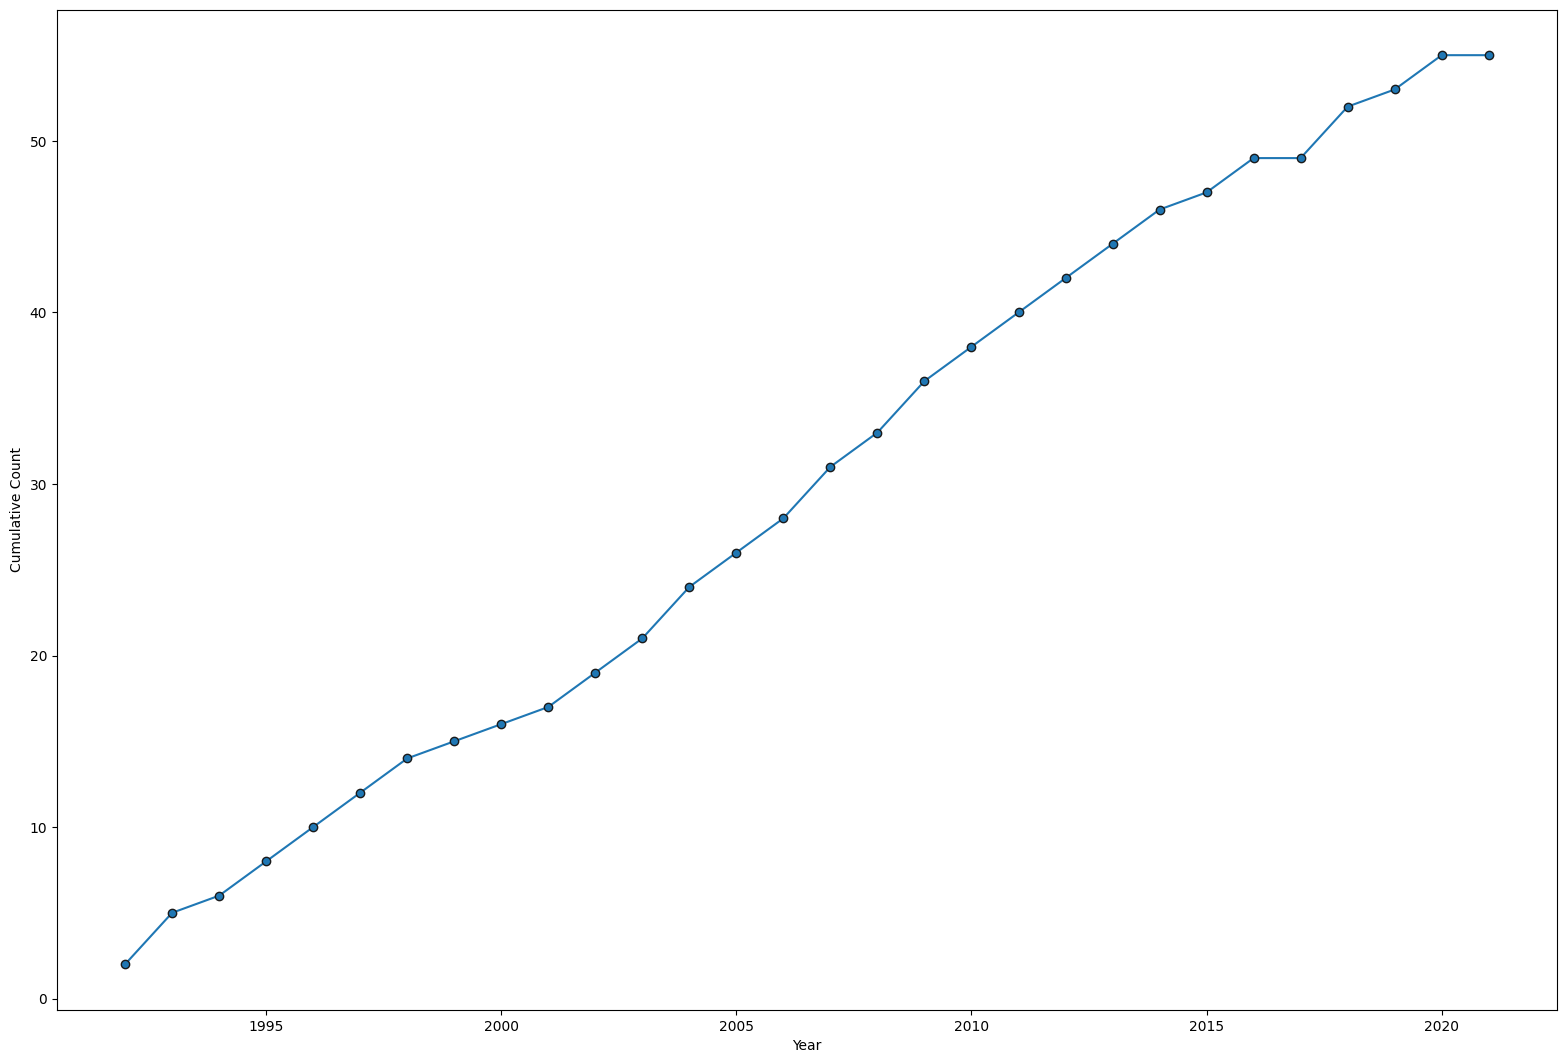

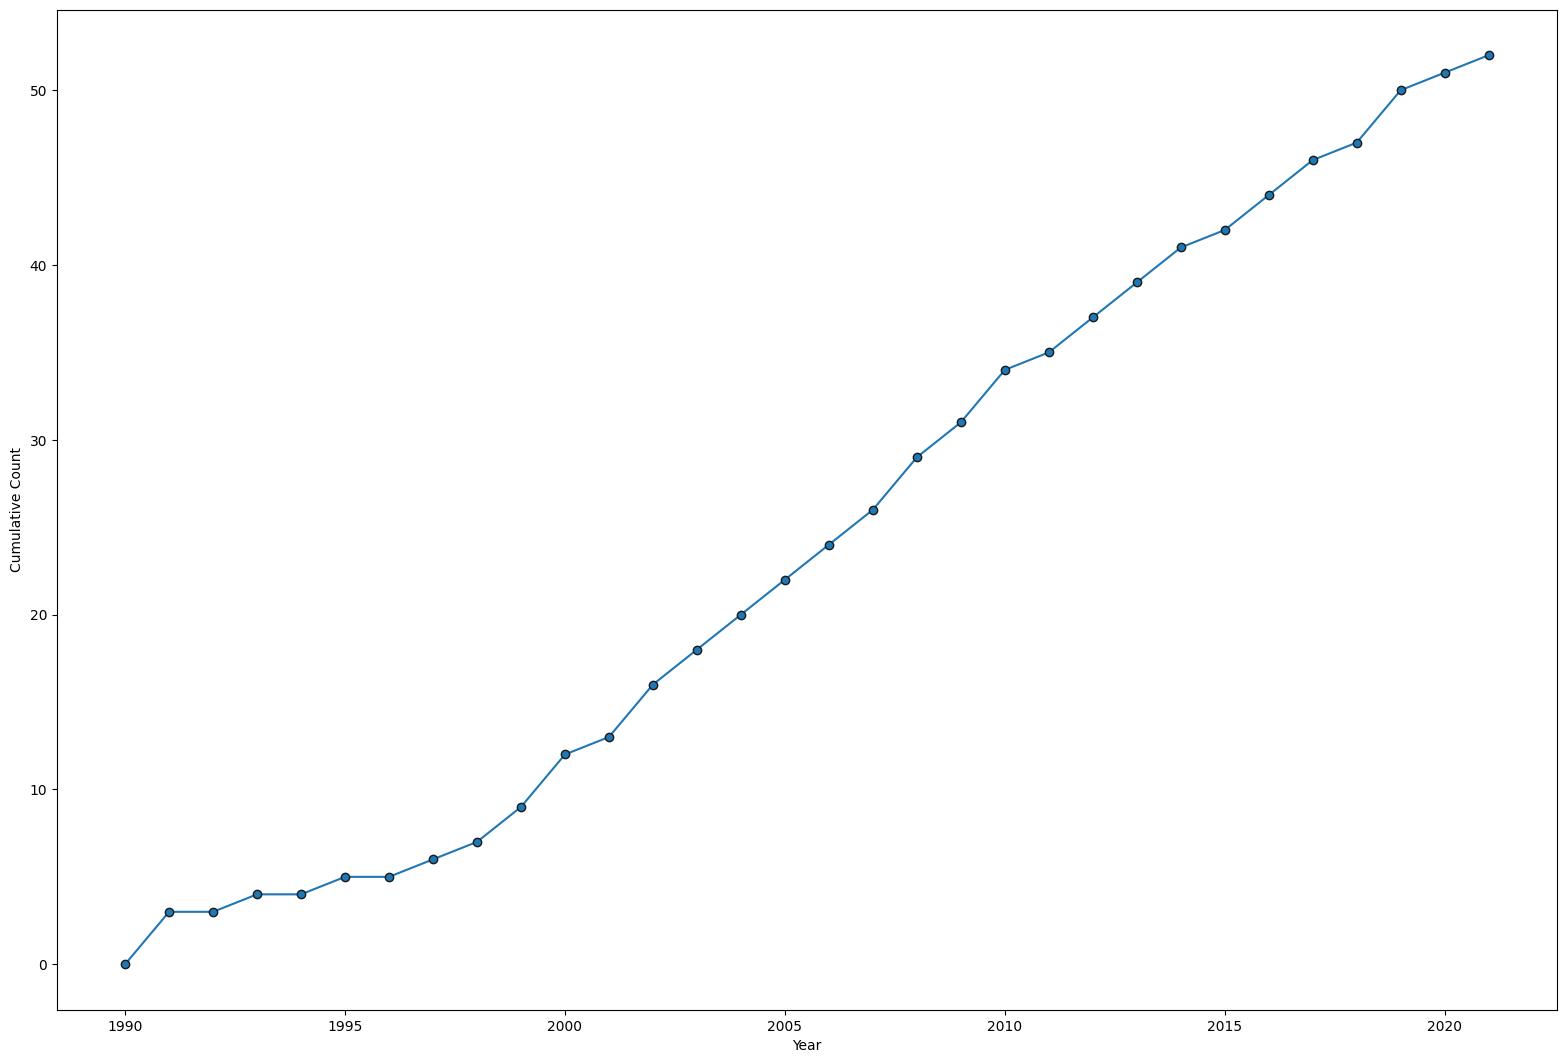

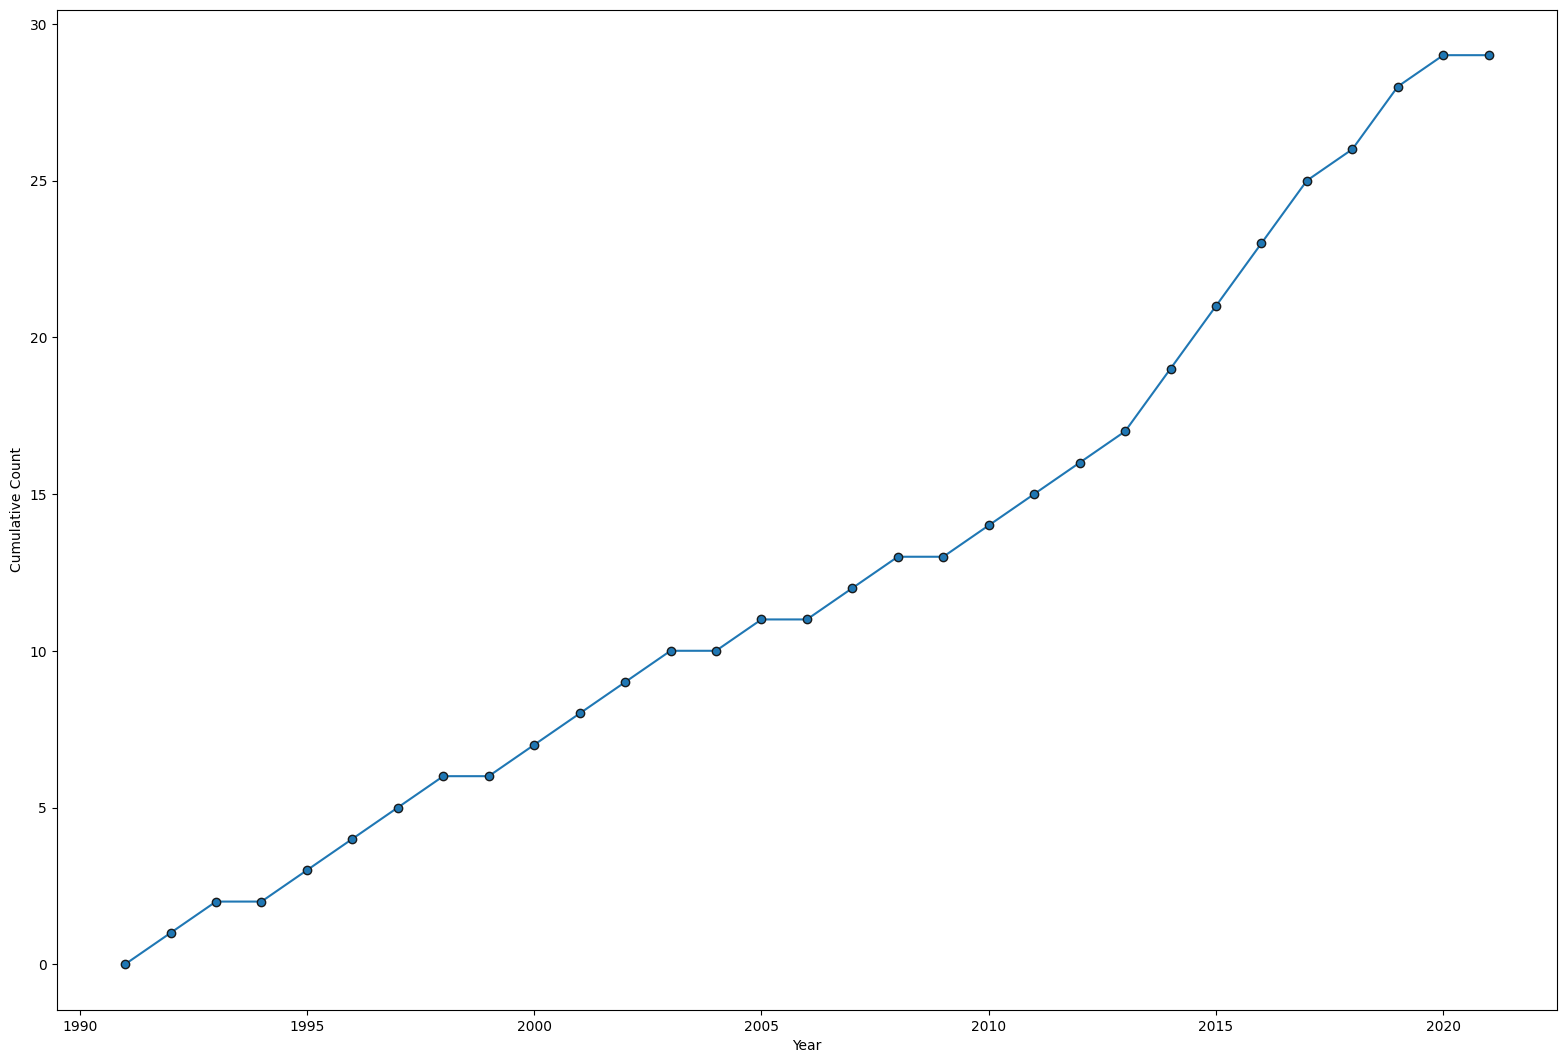

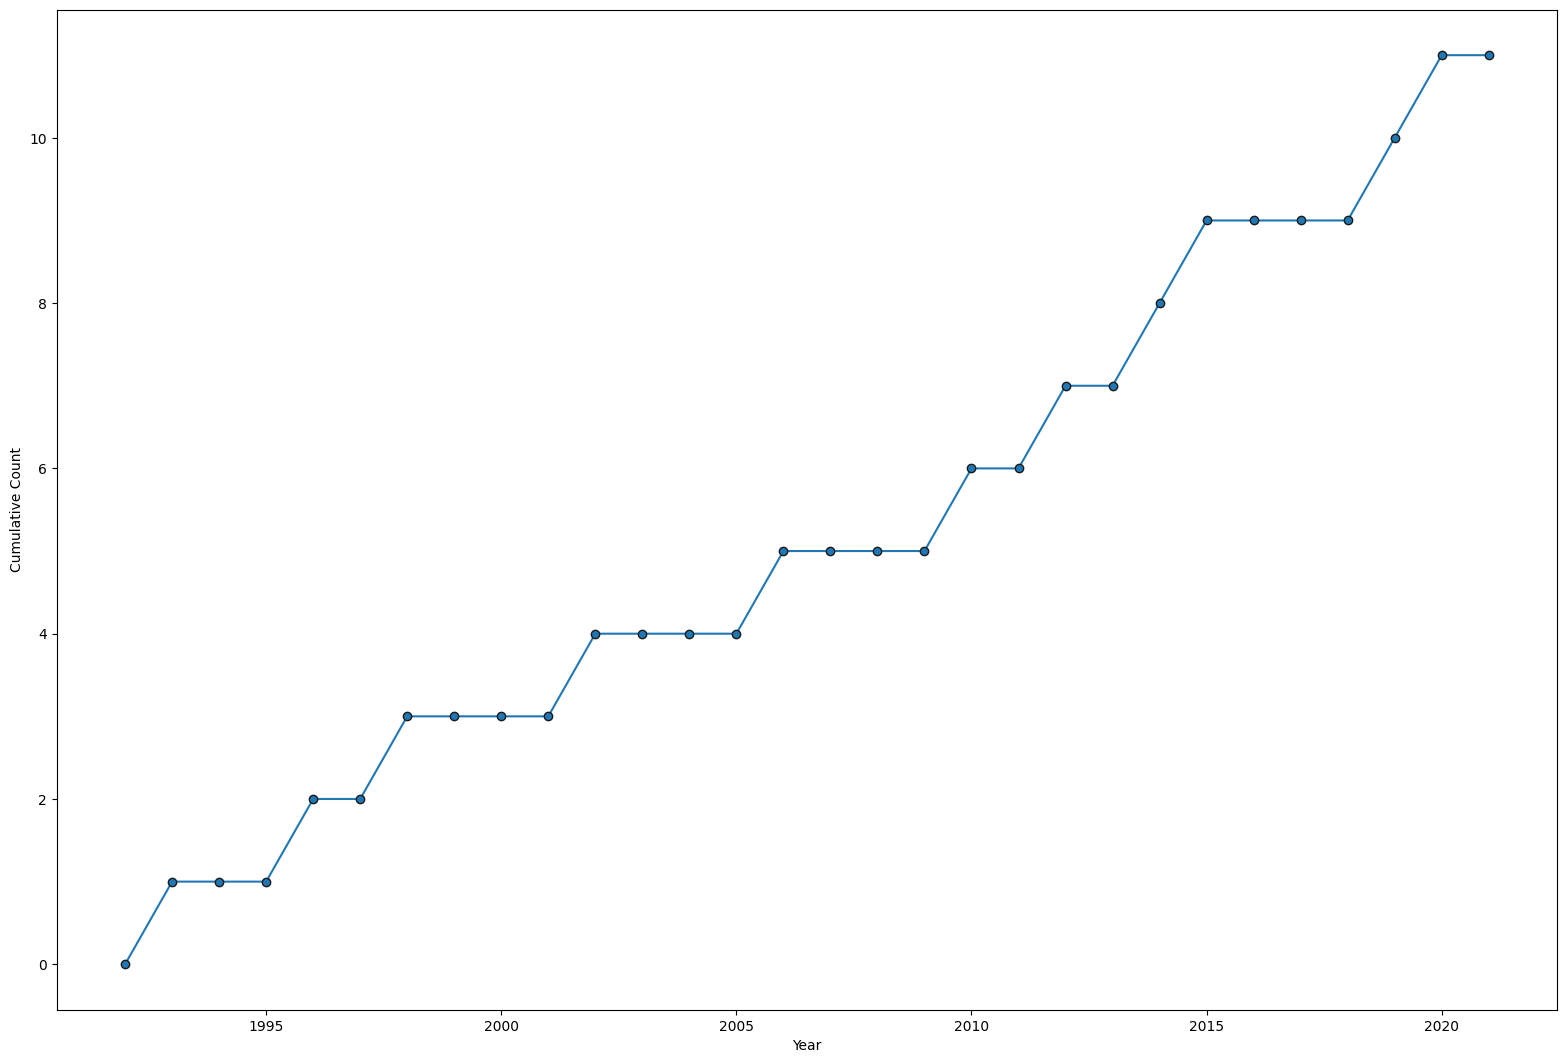

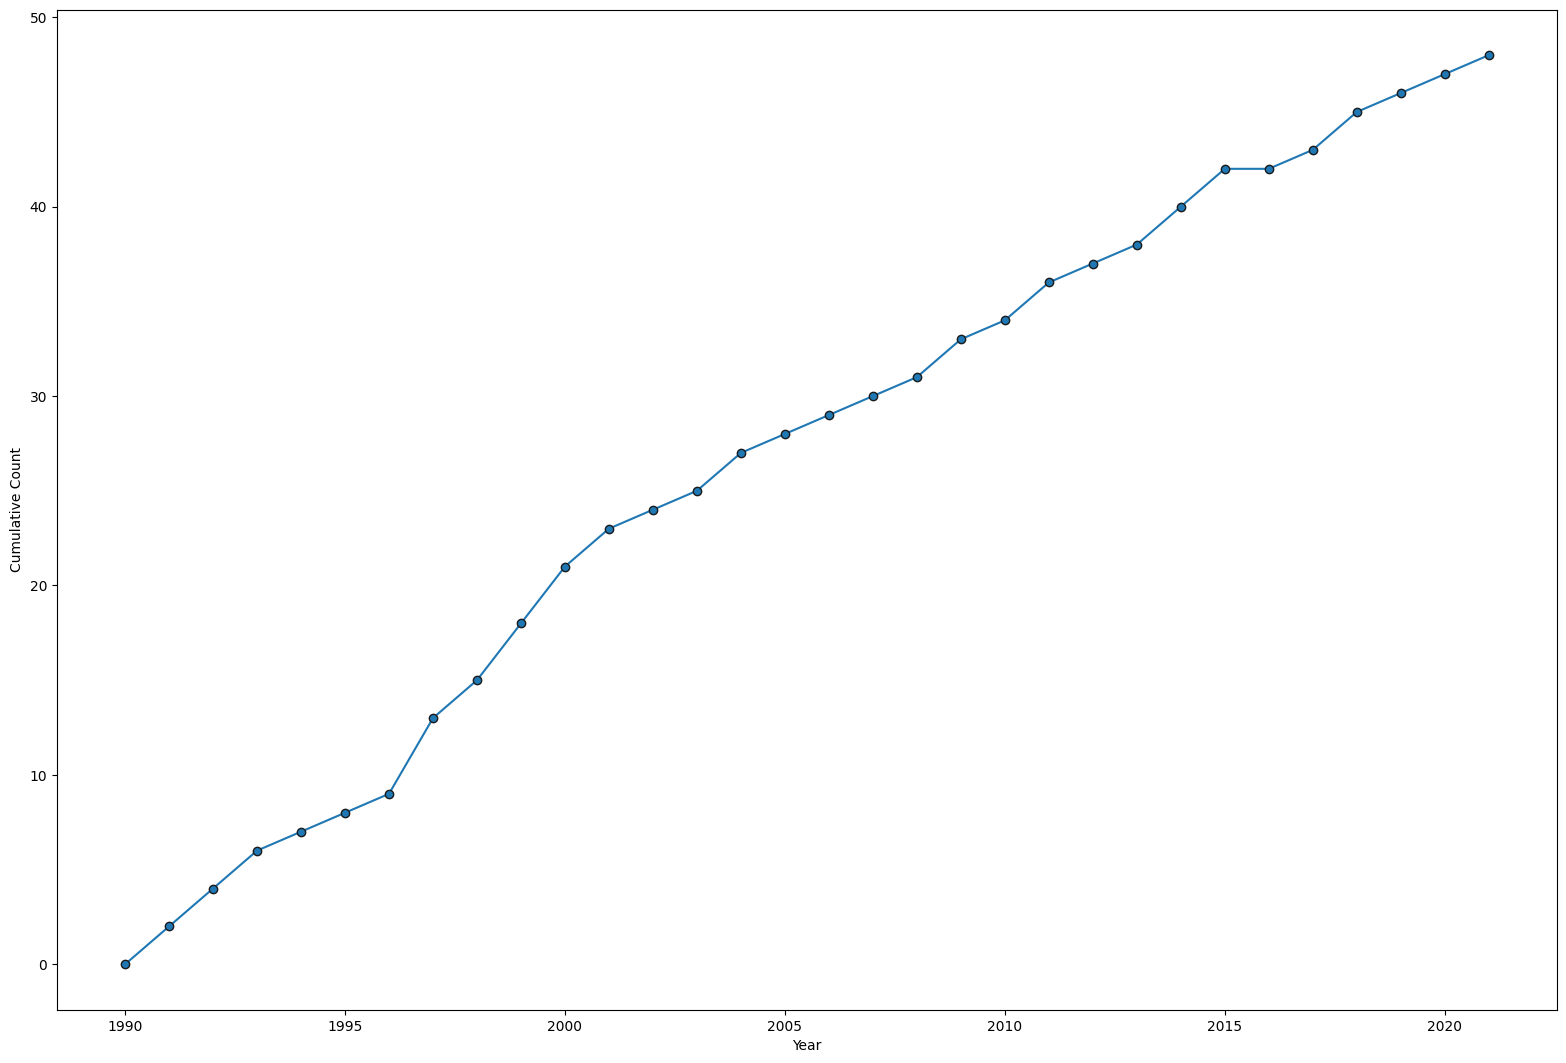

In [24]:
sns.reset_defaults()

temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')


for file_name in os.listdir(temporal_dfs_path):

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_axes([0, 0, 1, 1])

    field_name = file_name.split('.parquet')[0]
    
    df = pl.read_csv(os.path.join(OUTPUT_PATH, 'citation_graphs', field_name + '.edgelist'), sep=' ', has_header=False)
    G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph, source='column_1', target='column_2')

    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    
    print()
    measurement = {}
    for year, dois in zip(df['Year'], df['CumDoi']):
        measurement[year] = nx.dag_longest_path_length(G.subgraph(dois))

    years = measurement.keys()
    measurement = measurement.values()

    ax.plot(years, measurement, 'o-', markeredgewidth=1, markeredgecolor='k')
    ax.set_xlabel('Year')
    ax.set_ylabel('Cumulative Count')

    ax.grid(False)

    fig.tight_layout()

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'citation_temp_dag_longest_path', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=150,
        bbox_inches='tight'
    )

# Temporal Logarithmically Increasing Geodesic

In [14]:
sns.reset_defaults()

temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')


for file_name in os.listdir(temporal_dfs_path):

    field_name = file_name.split('.parquet')[0]
    print(field_name)
    
    df = pl.read_csv(os.path.join(OUTPUT_PATH, 'citation_graphs', field_name + '.edgelist'), sep=' ', has_header=False)
    G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph, source='column_1', target='column_2')

    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    
    measurement = {}
    for year, dois in zip(df['Year'], df['CumDoi']):
        G_sub = G.subgraph(dois).to_undirected()
        weak_comp = max(nx.connected_components(G_sub), key=len)
        measurement[year] = nx.average_shortest_path_length(G.to_undirected().subgraph(weak_comp))

    years = measurement.keys()
    measurement = measurement.values()

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_axes([0, 0, 1, 1])

    ax.plot(years, measurement, 'o-', markeredgewidth=1, markeredgecolor='k')
    ax.set_xlabel('Year')
    ax.set_ylabel('Cumulative Count')

    ax.grid(False)

    fig.tight_layout()

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'citation_temp_avg_geodesic', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=150,
        bbox_inches='tight'
    )

# Temporal In Degree Centrality

In [155]:
temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')
temporal_map = {}
for file_name in os.listdir(temporal_dfs_path):
    field_name = file_name.split('.parquet')[0]
    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    temporal_map[field_name] = df.select(pl.col('Year'), pl.col('CumDoi'))

Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


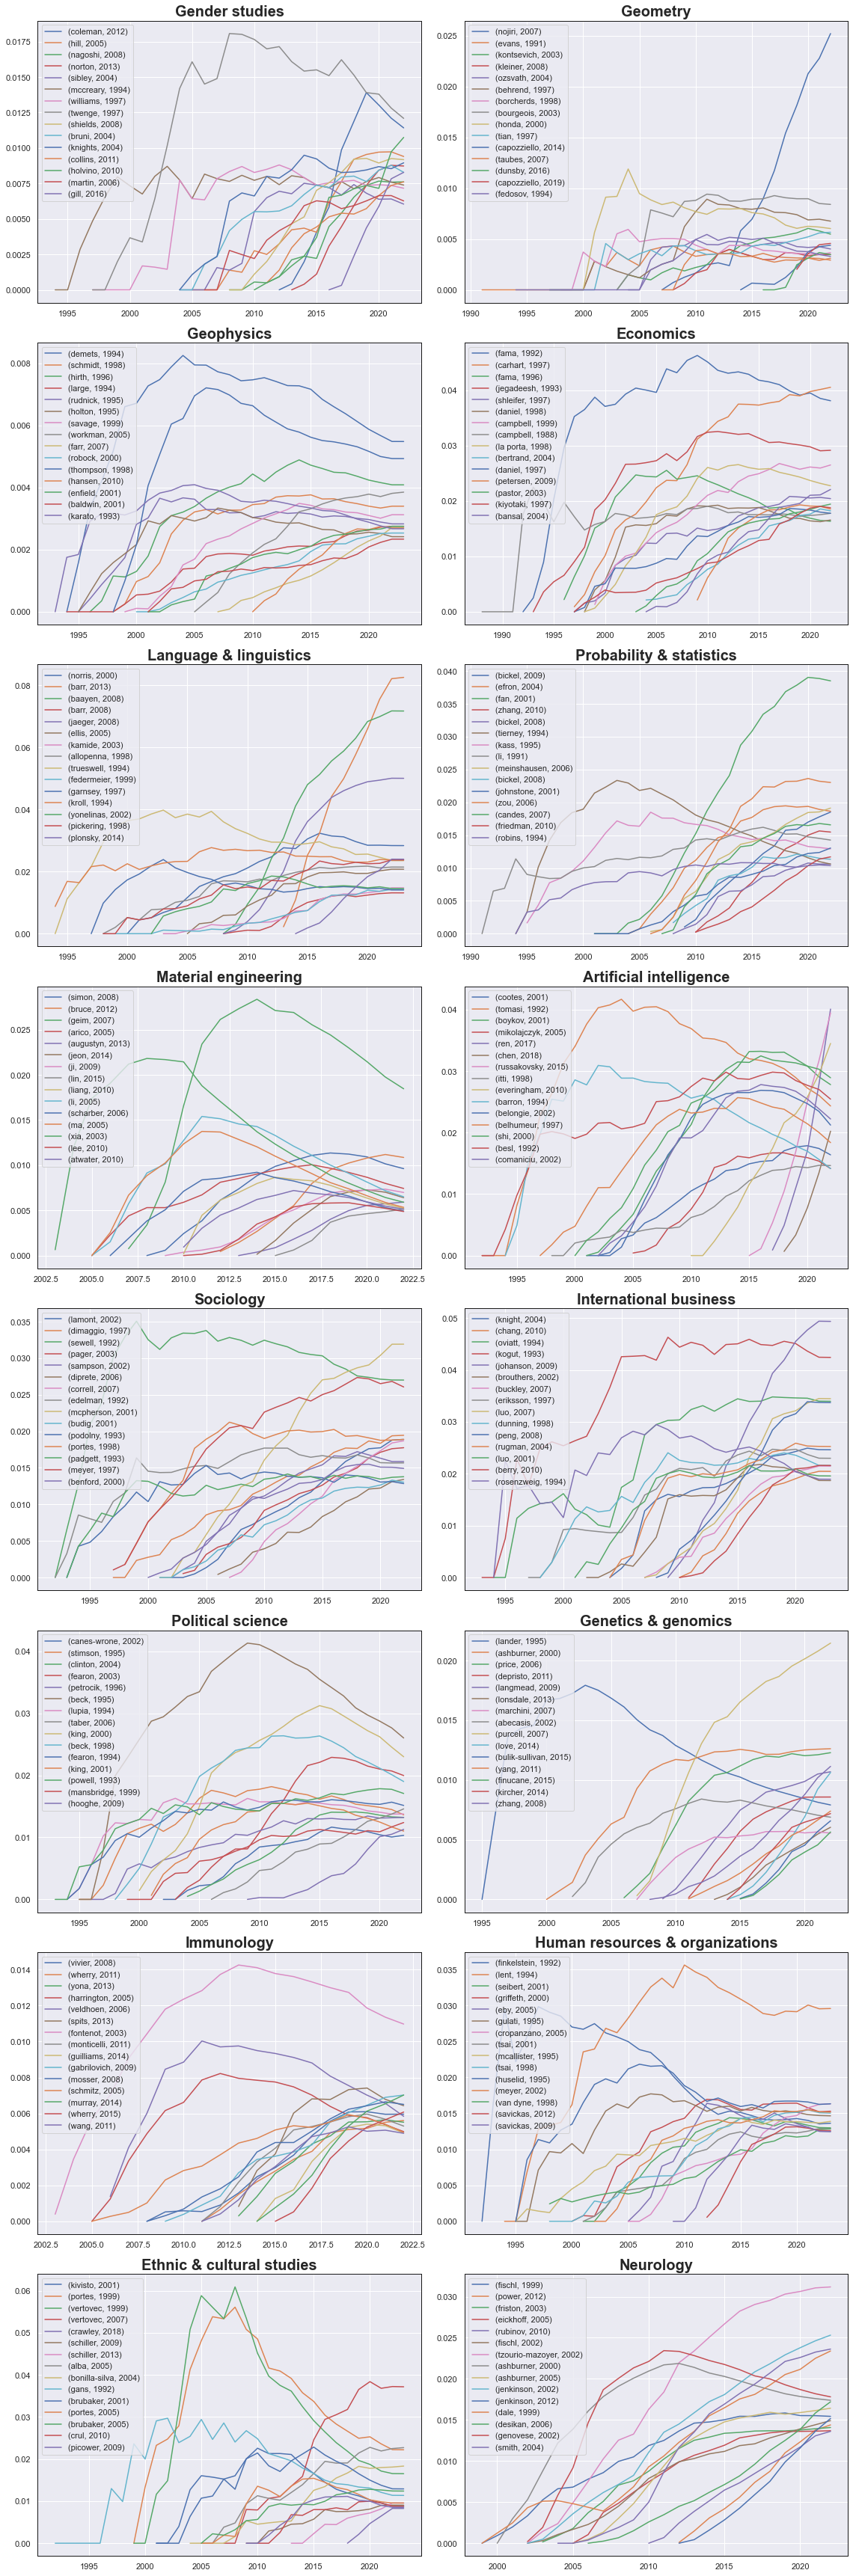

In [161]:
n = 15
n_cols = 2
n_rows = np.ceil(len(field_names) / n_cols)

sns.set()

fig, axs = plt.subplots(int(n_rows), int(n_cols), figsize=(n_cols*8, n_rows*6))
for (field_name, years_dois), ax in zip(temporal_map.items(), axs.flatten()):
    print(field_name)

    df = pl.read_csv(os.path.join(OUTPUT_PATH, f'citation_graphs/{field_name}.edgelist'), sep=' ', new_columns=['source', 'target'])
    G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph)

    yearly_centralities = {}
    for year, doi in years_dois.to_numpy():
        all_centralities = dict(zip(G.nodes, np.full(len(G), None)))
        year_centralities = dict(nx.in_degree_centrality(G.subgraph(doi)))
        all_centralities.update(year_centralities)
        yearly_centralities[year] = all_centralities

    years = list(yearly_centralities.keys())
    centralities = list(yearly_centralities.values())

    df = (
        pl.from_dicts(centralities)
        .with_columns(
            pl.Series('Year', years, pl.UInt32), 
            pl.all(),
        )
    )

    df_temp = df.transpose(include_header=True, header_name='Doi', column_names=df['Year'].cast(pl.Utf8).to_list())[:-1]
    last_col = df_temp[:, -1].name
    most_cited = df_temp.select(pl.col('Doi'), pl.col(last_col)).sort(last_col, descending=True)[:n]['Doi'].to_list()
    df_t = df_temp.filter(pl.col('Doi').is_in(most_cited)) # .transpose(include_header=True, header_name='Year', column_names=df_temp['Doi'].to_list())[1:]
    dois = df_t['Doi'].to_list()
    df_dates = df_t.select(pl.all().exclude('Doi'))
    years = df_dates.columns
    x = list(map(lambda s: int(s), years))
    ys = df_dates.to_numpy()

    lst_doi = df_t['Doi'].to_list()
    doi_name_map = get_node_names(field_name, lst_doi)

    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1)

    ax.set_title(field_name.capitalize(), fontweight='semibold', fontsize=20)

    for y, doi in zip(ys, lst_doi):
        ax.plot(x,y, label=doi_name_map[doi])

    ax.legend()

fig.tight_layout()
# plt.savefig(f'{OBSIDIAN_IMG_PATH}/citation_temporal_indegree_centrality.png')
plt.show()

# 12 m

# Temporal Clustering

In [7]:
temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')
data = []
field_names = []
for file_name in os.listdir(temporal_dfs_path):
    field_name = file_name.split('.parquet')[0]
    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    field_names.append(field_name)
    data.append((df['Year'], df['CumDoi']))

Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


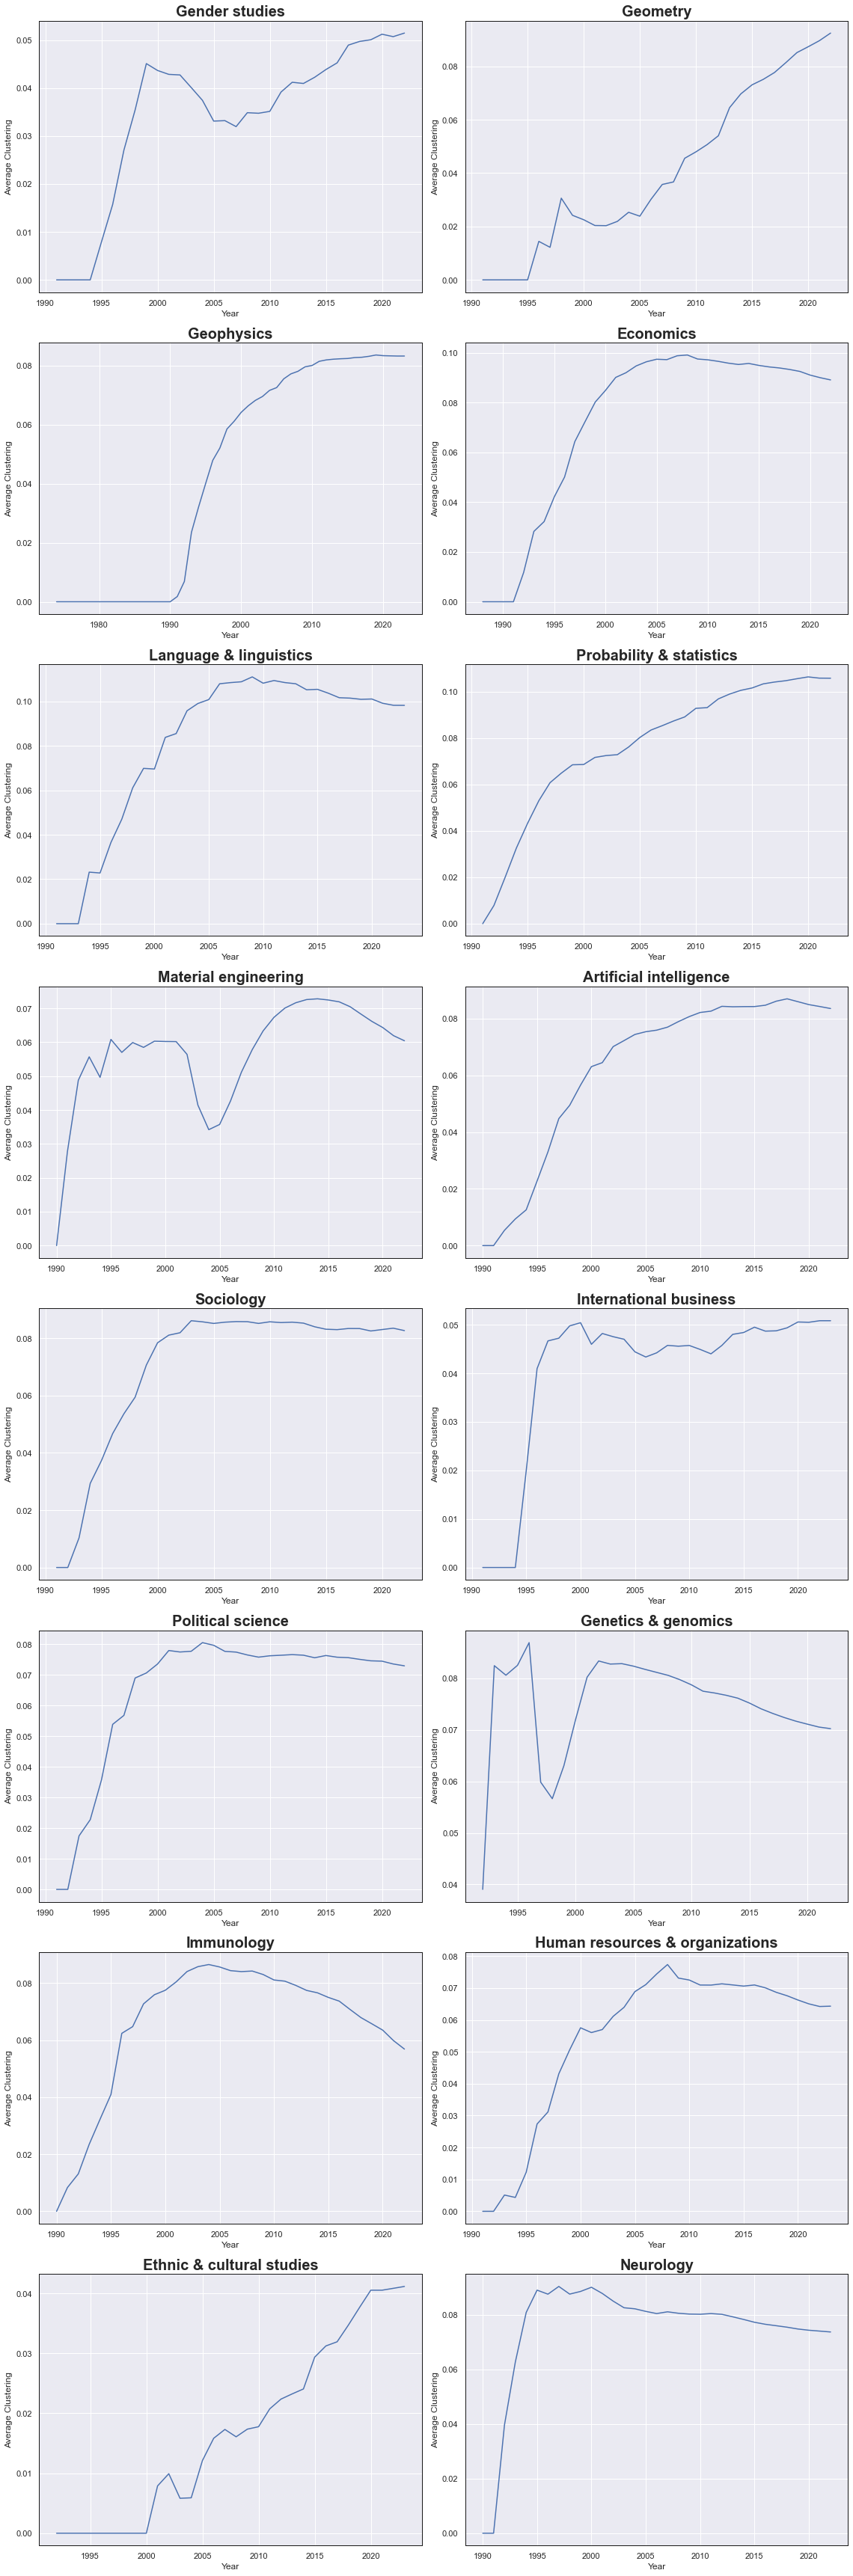

In [8]:
n_cols = 2
n_rows = np.ceil(len(field_names) / n_cols)

sns.set()

fig, axs = plt.subplots(int(n_rows), int(n_cols), figsize=(n_cols*8, n_rows*6))
for field_name, (years, dois), ax in zip(field_names, data, axs.flatten()):

    print(field_name)

    df = pl.read_csv(os.path.join(OUTPUT_PATH, 'citation_graphs', field_name + '.edgelist'), sep=' ', has_header=False)
    G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph, source='column_1', target='column_2')

    avg_clustering = {}
    for year, doi in zip(years, dois):
        G_sub = G.subgraph(doi)
        # large_component = list(nx.weakly_connected_components(G_sub))
        # if len(large_component) == 0:
        #     avg_clustering[year] = 0
        #     continue
        # connected_component = max(large_component, key=len)
        # G_t = G.subgraph(connected_component)
        # G_t = G_t.to_undirected()
        avg_clustering[year] = nx.average_clustering(G_sub)

    years = avg_clustering.keys()
    avg_clustering = avg_clustering.values()

    ax.plot(years, avg_clustering)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Clustering')

    ax.set_title(field_name.capitalize(), fontweight='semibold', fontsize=20)

    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1)

fig.tight_layout()
plt.savefig(f'{OBSIDIAN_IMG_PATH}/temporal_clustering.png')

plt.show()

# 2 h

# Tempral Transitivity

In [5]:
temporal_dfs_path = os.path.join(OUTPUT_PATH, 'temporal_dfs')
data = []
field_names = []
for file_name in os.listdir(temporal_dfs_path):
    field_name = file_name.split('.parquet')[0]
    df = pl.read_parquet(os.path.join(temporal_dfs_path, file_name))
    field_names.append(field_name)
    data.append((df['Year'], df['CumDoi']))

Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


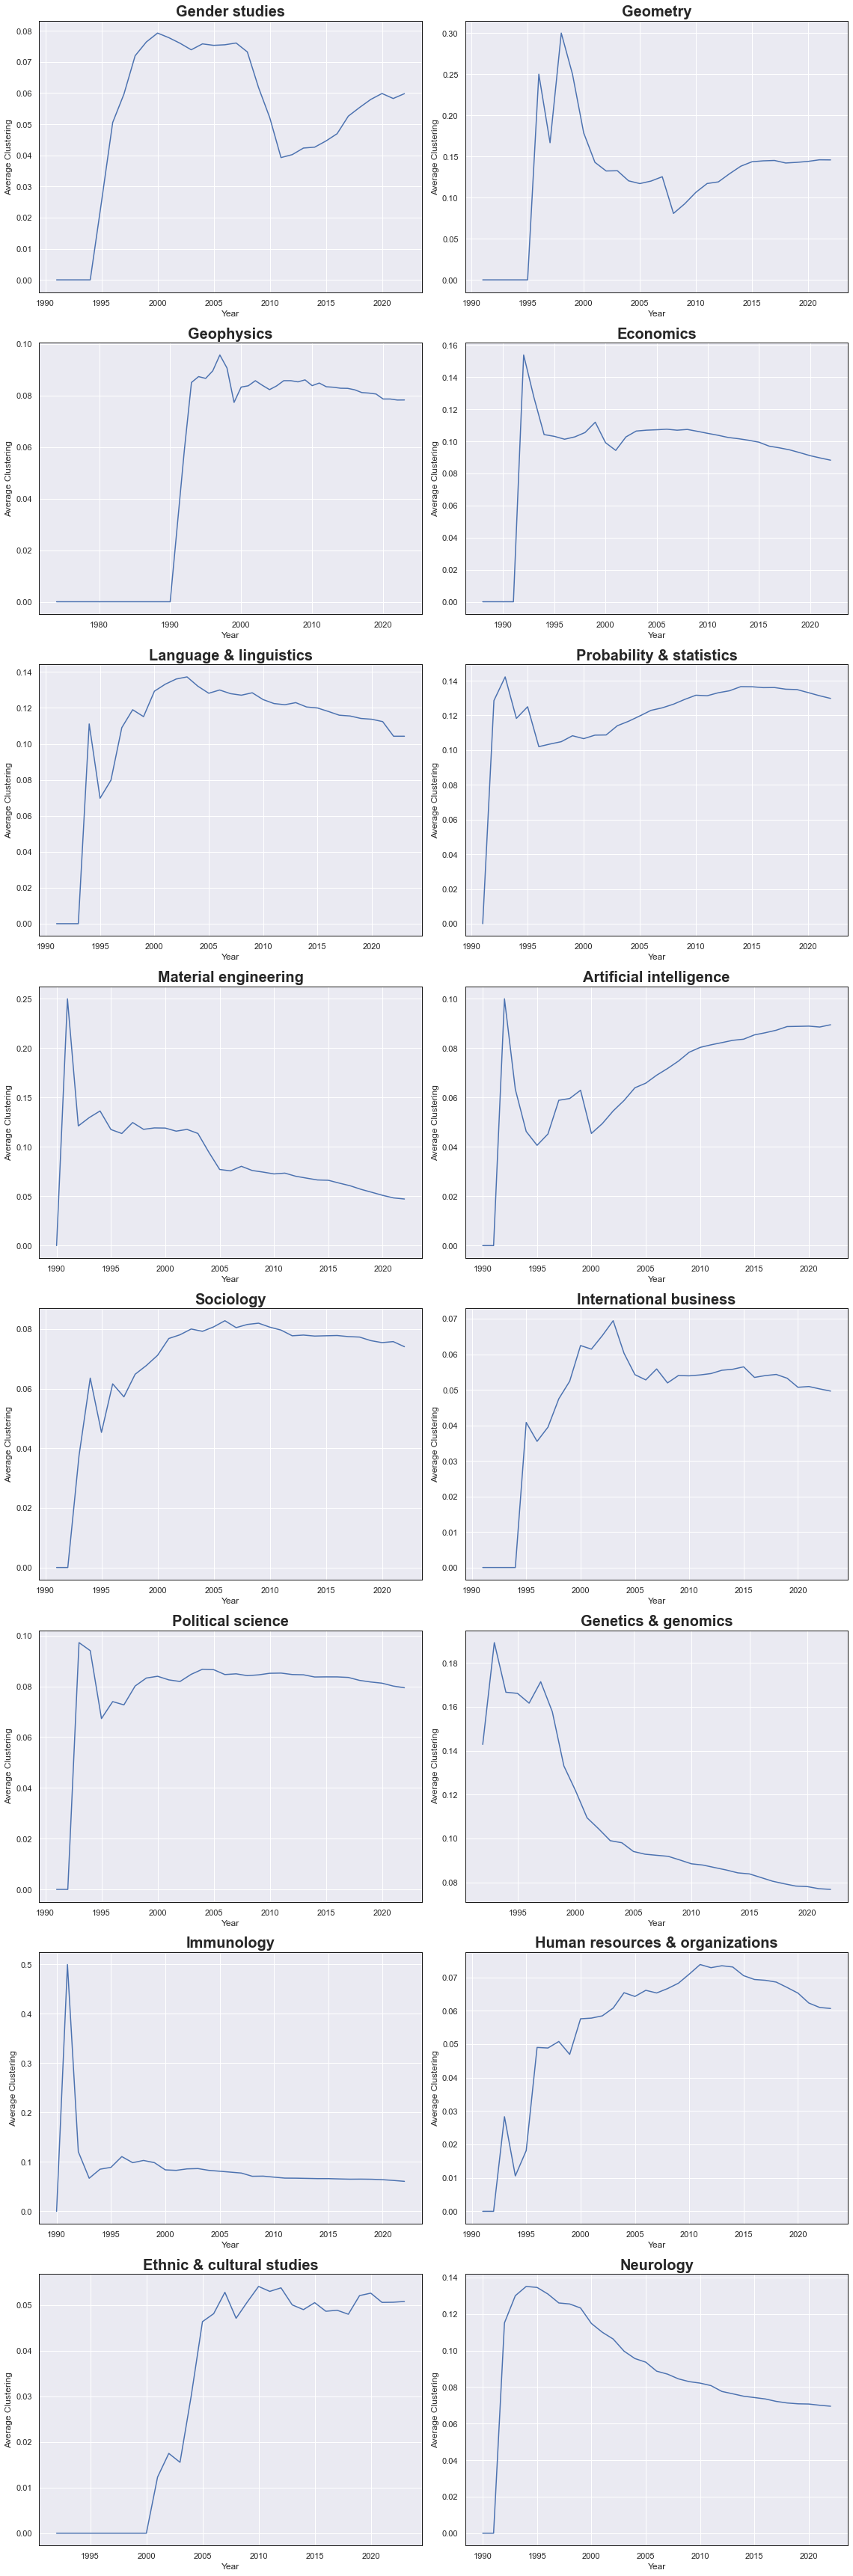

In [9]:
n_cols = 2
n_rows = np.ceil(len(field_names) / n_cols)

sns.set()

fig, axs = plt.subplots(int(n_rows), int(n_cols), figsize=(n_cols*8, n_rows*6))
for field_name, (years, dois), ax in zip(field_names, data, axs.flatten()):

    print(field_name)

    df = pl.read_csv(os.path.join(OUTPUT_PATH, 'citation_graphs', field_name + '.edgelist'), sep=' ', has_header=False)
    G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph, source='column_1', target='column_2')

    avg_transitivity = {}
    for year, doi in zip(years, dois):
        G_sub = G.subgraph(doi)
        # large_component = list(nx.weakly_connected_components(G_sub))
        # if len(large_component) == 0:
        #     avg_transitivity[year] = 0
        #     continue
        # connected_component = max(large_component, key=len)
        # G_t = G.subgraph(connected_component)
        # G_t = G_t.to_undirected()
        avg_transitivity[year] = nx.transitivity(G_sub)

    years = avg_transitivity.keys()
    avg_transitivity = avg_transitivity.values()

    ax.plot(years, avg_transitivity)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Clustering')

    ax.set_title(field_name.capitalize(), fontweight='semibold', fontsize=20)

    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1)

fig.tight_layout()
plt.savefig(f'{OBSIDIAN_IMG_PATH}/temporal_transitivity.png')

plt.show()

# 2 h